In [1]:
from fitness import *

import random
import copy

import datetime
from datetime import datetime, timedelta

#### CLASE EXPERIMENTO ####

class Experiment:
    def __init__(self):
        self.teams = []
        self.scores = []
        self.times = []
        self.iterations = []
    
    def add(self) -> None:
        global best_score
        global best_team
        global time_start
        global iterations

        if not self.scores or self.scores[-1]<best_score:
            self.teams.append(best_team[:])
            self.scores.append(best_score)
            self.times.append((datetime.now() - time_start).total_seconds()) 
            self.iterations.append(iterations)
    
    def showTable(self) -> None:
        table_html = "<table><tr><th>Teams</th><th>Scores</th><th>Times</th><th>Iterations</th></tr>"
        for team, score, time, iteration in zip(self.teams, self.scores, self.times, self.iterations):
            team_images = ''.join([f'<img src="https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/{pokemon_id}.png" width="50" height="50">' for pokemon_id in team])
            table_html += f"<tr><td>{team_images}</td><td>{score}</td><td>{time}</td><td>{iteration}</td></tr>"
        table_html += "</table>"
        display(HTML(table_html))
        


#### ALGORITMO GENÉTICO ####

# Bucle de ejecución
def run_genetic(population) -> Experiment:
    global iterations
    iterations = 0

    global best_score
    best_score = -1.0

    global time_start
    time_start = datetime.now()

    global stop_condition

    experiment = Experiment()

    while stop_condition():
        genetic_it(population)
        iterations += 1
        experiment.add()
        
    experiment.add()

    return experiment


# Iteración del algoritmo genetico
def genetic_it(population:list[list[int]]) -> None:
    select(population)
    reproduce(population)
    mutate(population)
    remove(population)
    enviorment()
  



#### FUNCIONES A ELEGIR ####

def cloning(population:list[list[int]]):
    global copies   # clones de cada individuo

    for i in range(len(population)):
        for _ in range(copies):
            population.append(copy.copy(population[i]))


def mutate_random_rate(population:list[list[int]]):
    global mutation_rate   #  ratio de que un gen mute

    global best_team
    
    for team in population:
        if id(team) != id(best_team):
            for i in range(N):                
                if mutation_rate >= random.uniform(0, 1.0):
                    team[i] = random.randint(1, D)


best_team = [1,1,1, 1,1,1]
best_score = -1.0
def survive_the_best(population):
    global survivors   # número de supervivientes que quedan al final de la iteración

    global best_score
    global best_team


    maxq_teams = q.PriorityQueue()

    for team in population:
        ts = teamScore(team)
        if ts > best_score:
            best_team = team
            best_score = ts
        maxq_teams.put((-ts, team))
    
    population.clear()
    for i in range(min(survivors, maxq_teams.qsize())):
        _,survivor = maxq_teams.get()
        population.append(survivor)

def cloning(population:list[list[int]]):
    global copies   # clones de cada individuo

    for i in range(len(population)):
        for _ in range(copies):
            population.append(copy.copy(population[i]))


def mutate_random_rate(population:list[list[int]]):
    global mutation_rate   #  ratio de que un gen mute

    global best_team
    
    for team in population:
        if id(team) != id(best_team):
            for i in range(N):                
                if mutation_rate >= random.uniform(0, 1.0):
                    team[i] = random.randint(1, D)

    

best_team = [1,1,1, 1,1,1]
best_score = -1.0
def survive_the_best(population):
    global survivors   # número de supervivientes que quedan al final de la iteración

    global best_score
    global best_team


    maxq_teams = q.PriorityQueue()

    for team in population:
        ts = teamScore(team)
        if ts > best_score:
            best_team = team
            best_score = ts
        maxq_teams.put((-ts, team))
    
    population.clear()
    for i in range(min(survivors, maxq_teams.qsize())):
        _,survivor = maxq_teams.get()
        population.append(survivor)


#### CONDICIONES DE PARADA #####

def stop_by_time() -> bool:
    global seconds

    global max_time
    max_time = datetime.now() + timedelta(seconds=seconds)

    global stop_condition
    stop_condition = check_stop_by_time

    return True


# Función de parámetro inicializado (se ejecuta el resto de iteraciones)
def check_stop_by_time() -> bool:
    global max_time

    if datetime.now() > max_time:
        global stop_condition
        stop_condition = stop_by_time
        return False

    return True


stop_condition = stop_by_time

def select(population): pass
def enviorment(): pass


In [6]:
reproduce = cloning
copies = 2

mutate = mutate_random_rate
mutation_rate = 1/95

remove = survive_the_best
survivors = 4

stop_condition = stop_by_time
seconds = 300

N = 100
D = 1024

experiment1 = run_genetic([[1 for _ in range(N)]])

Text(0, 0.5, 'fitness')

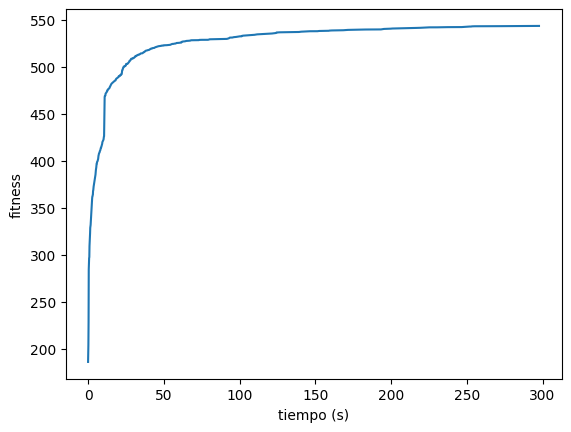

In [7]:
plt.plot(experiment1.times, experiment1.scores)
plt.xlabel('tiempo (s)')
plt.ylabel('fitness')

In [36]:
experiment2 = run_genetic([[1,1,1, 1,1,1]])

In [8]:
best_team

[1020,
 796,
 983,
 643,
 894,
 721,
 801,
 798,
 485,
 801,
 644,
 801,
 638,
 384,
 894,
 383,
 416,
 485,
 721,
 801,
 250,
 791,
 384,
 485,
 643,
 250,
 484,
 721,
 798,
 643,
 795,
 485,
 720,
 644,
 643,
 795,
 485,
 1019,
 805,
 805,
 983,
 983,
 484,
 249,
 383,
 249,
 791,
 806,
 644,
 791,
 1008,
 801,
 485,
 484,
 483,
 476,
 485,
 357,
 983,
 476,
 794,
 890,
 805,
 894,
 984,
 983,
 805,
 905,
 384,
 792,
 484,
 805,
 791,
 484,
 485,
 485,
 798,
 484,
 250,
 1019,
 792,
 791,
 485,
 721,
 476,
 409,
 638,
 805,
 983,
 801,
 894,
 795,
 1021,
 383,
 791,
 208,
 793,
 798,
 250,
 983]

In [38]:
experiment3 = run_genetic([[1,1,1, 1,1,1]])

In [40]:
experiment3.showTable()

Teams,Scores,Times,Iterations
,176.10158997616787,0.003007,1
,269.2687290497157,0.014004,2
,273.33383300625616,0.029004,3
,285.76369817027,0.040047,4
,292.962571752511,0.063006,6
,298.98392889658203,0.074003,7
,301.8781209515281,0.085073,8
,301.891116388396,0.307533,19
,301.94756237044396,0.319533,20
,303.8952463678653,0.398045,27


Text(0, 0.5, 'fitness')

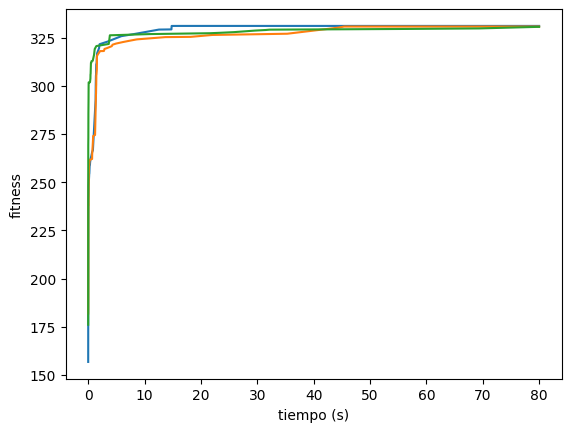

In [43]:
import matplotlib.pyplot as plt

def add_end_point(experiment: Experiment, x_max:int):
    experiment.times.append(x_max)
    experiment.scores.append(experiment.scores[-1])

add_end_point(experiment1, 80)
add_end_point(experiment2, 80)
add_end_point(experiment3, 80)

plt.plot(experiment1.times, experiment1.scores)
plt.plot(experiment2.times, experiment2.scores)
plt.plot(experiment3.times, experiment3.scores)


plt.xlabel('tiempo (s)')
plt.ylabel('fitness')

In [49]:
reproduce = cloning
copies = 2

mutate = mutate_random_rate
mutation_rate = 1/17

remove = survive_the_best
survivors = 4

stop_condition = stop_by_time
seconds = 90

N = 20
D = 1024

experiment1 = run_genetic([[1 for _ in range(20)]])

In [46]:
experiment1.showTable()

Teams,Scores,Times,Iterations
,232.5147071241064,0.007513,1
,250.68746616238838,0.029512,2
,258.14327713611436,0.059591,3
,277.5482265229607,0.087512,4
,277.96548148451086,0.115106,5
,278.15253645774874,0.142113,6
,293.1507221092576,0.170106,7
,353.8073407385715,0.197108,8
,355.6746048627943,0.223612,9
,358.212066583773,0.525915,20


In [50]:
experiment2 = run_genetic([[1 for _ in range(20)]])

In [51]:
experiment2.showTable()

Teams,Scores,Times,Iterations
,230.18092277232523,0.007002,1
,246.18980199873653,0.055005,3
,255.90355985743562,0.110198,5
,262.57703354841817,0.138194,6
,278.1346060625509,0.166333,7
,281.87685448607,0.193902,8
,283.01981093021533,0.221901,9
,284.35339716110855,0.248868,10
,287.49391670130365,0.275918,11
,290.5966303002611,0.303542,12


In [52]:
seconds = 600
experiment_10m_1 = run_genetic([[1 for _ in range(20)]])

In [54]:
experiment_10m_1.showTable()

Teams,Scores,Times,Iterations
,211.85026096030518,0.007011,1
,219.17246155581455,0.028009,2
,233.80701906002287,0.055224,3
,241.4282533263199,0.081754,4
,260.86861599720305,0.108778,5
,263.9936475077867,0.137555,6
,266.42909930949463,0.164607,7
,271.3573565872173,0.192253,8
,291.86552104002976,0.219306,9
,304.91888931549715,0.247335,10


Text(0, 0.5, 'fitness')

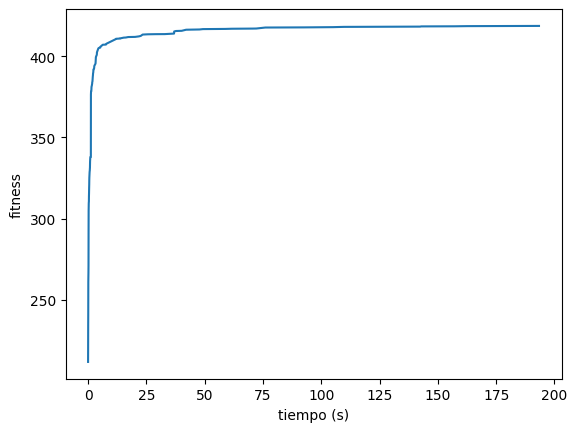

In [57]:
plt.plot(experiment_10m_1.times, experiment_10m_1.scores)
plt.xlabel('tiempo (s)')
plt.ylabel('fitness')

In [59]:
reproduce = cloning
copies = 2

mutate = mutate_random_rate
mutation_rate = 1/95

remove = survive_the_best
survivors = 4

stop_condition = stop_by_time
seconds = 120

N = 100
D = 1024

experiment1 = run_genetic([[1 for _ in range(100)]])

Text(0, 0.5, 'fitness')

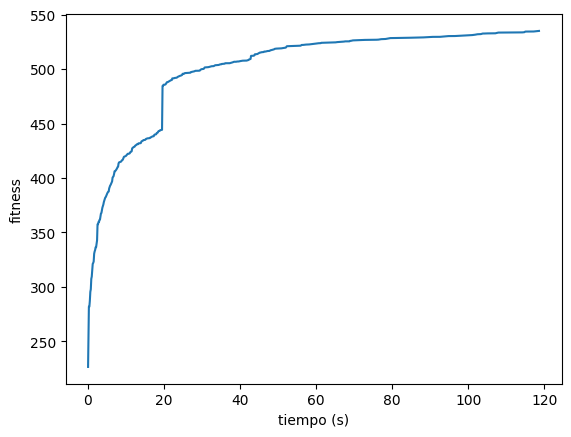

In [60]:
plt.plot(experiment1.times, experiment1.scores)
plt.xlabel('tiempo (s)')
plt.ylabel('fitness')

In [62]:

seconds = 160

experiment2 = run_genetic([[1 for _ in range(100)]])

Text(0, 0.5, 'fitness')

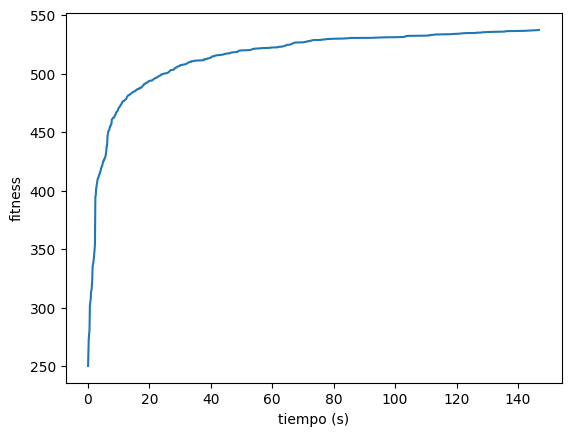

In [64]:
plt.plot(experiment2.times, experiment2.scores)
plt.xlabel('tiempo (s)')
plt.ylabel('fitness')

In [66]:
seconds = 300

experiment2 = run_genetic([[1 for _ in range(100)]])

teamScore = 542.7763817431567


#ID,Imagen,Nombre,Tipo,Estadísticas,Atacando frente a tipos,Defendiendo frente a tipos
#793,,Nihilego,"['rock', 'poison']",,"x2: ['fire', 'ice', 'flying', 'bug', 'grass']x0.5: ['fighting', 'ground', 'steel', 'poison', 'ground', 'rock', 'ghost', 'steel']","/4: ['poison']/2: ['normal', 'fire', 'flying', 'bug', 'fairy']/0.5: ['water', 'psychic', 'steel'] /0.25: ['ground']"
#791,,Solgaleo,"['psychic', 'steel']",,"x2: ['fighting', 'poison', 'ice', 'rock', 'fairy']x0.5: ['psychic', 'dark', 'steel', 'fire', 'water', 'electric', 'steel']","/4: ['psychic']/2: ['normal', 'grass', 'ice', 'poison', 'flying', 'rock', 'dragon', 'steel', 'fairy']/0.5: ['fire', 'ground'] /0.25: []"
#795,,Pheromosa,"['bug', 'fighting']",,"x2: ['grass', 'psychic', 'dark', 'normal', 'ice', 'rock', 'dark', 'steel']x0.5: ['fire', 'fighting', 'poison', 'flying', 'ghost', 'fairy', 'poison', 'flying', 'bug', 'ghost', 'fairy']","/4: []/2: ['grass', 'fighting', 'ground', 'bug', 'dark']/0.5: ['fire', 'psychic', 'fairy'] /0.25: ['flying']"
#643,,Reshiram,"['dragon', 'fire']",,"x2: ['dragon', 'grass', 'ice', 'bug', 'steel']x0.5: ['fairy', 'fire', 'water', 'rock']","/4: ['fire', 'grass']/2: ['electric', 'bug', 'steel']/0.5: ['ground', 'rock', 'dragon'] /0.25: []"
#384,,Rayquaza,"['dragon', 'flying']",,"x2: ['dragon', 'grass', 'fighting', 'bug']x0.5: ['steel', 'fairy', 'electric', 'rock', 'steel']","/4: ['grass']/2: ['fire', 'water', 'fighting', 'ground', 'bug']/0.5: ['rock', 'dragon', 'fairy'] /0.25: ['ice']"
#485,,Heatran,"['fire', 'steel']",,"x2: ['grass', 'ice', 'bug', 'steel', 'ice', 'rock', 'fairy']x0.5: ['fire', 'water', 'dragon', 'fire', 'water', 'electric']","/4: ['grass', 'ice', 'bug', 'steel', 'fairy']/2: ['normal', 'poison', 'flying', 'psychic', 'ghost', 'dragon', 'dark']/0.5: ['water', 'fighting'] /0.25: ['ground']"
#485,,Heatran,"['fire', 'steel']",,"x2: ['grass', 'ice', 'bug', 'steel', 'ice', 'rock', 'fairy']x0.5: ['fire', 'water', 'dragon', 'fire', 'water', 'electric']","/4: ['grass', 'ice', 'bug', 'steel', 'fairy']/2: ['normal', 'poison', 'flying', 'psychic', 'ghost', 'dragon', 'dark']/0.5: ['water', 'fighting'] /0.25: ['ground']"
#484,,Palkia,"['water', 'dragon']",,"x2: ['fire', 'ground', 'rock', 'dragon']x0.5: ['water', 'grass', 'steel', 'fairy']","/4: ['fire', 'water']/2: ['steel']/0.5: ['dragon', 'fairy'] /0.25: []"
#983,,Kingambit,"['dark', 'steel']",,"x2: ['psychic', 'ghost', 'ice', 'rock', 'fairy']x0.5: ['fighting', 'dark', 'steel', 'fire', 'water', 'electric', 'steel']","/4: ['psychic', 'ghost', 'dark']/2: ['normal', 'grass', 'ice', 'poison', 'flying', 'rock', 'dragon', 'steel']/0.5: ['fire', 'ground'] /0.25: ['fighting']"
#484,,Palkia,"['water', 'dragon']",,"x2: ['fire', 'ground', 'rock', 'dragon']x0.5: ['water', 'grass', 'steel', 'fairy']","/4: ['fire', 'water']/2: ['steel']/0.5: ['dragon', 'fairy'] /0.25: []"

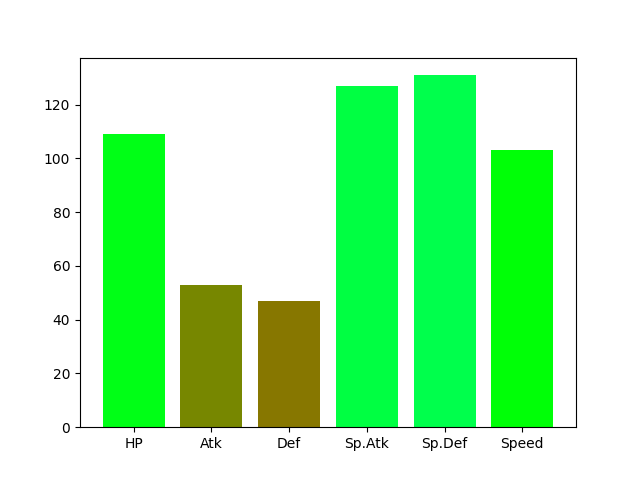
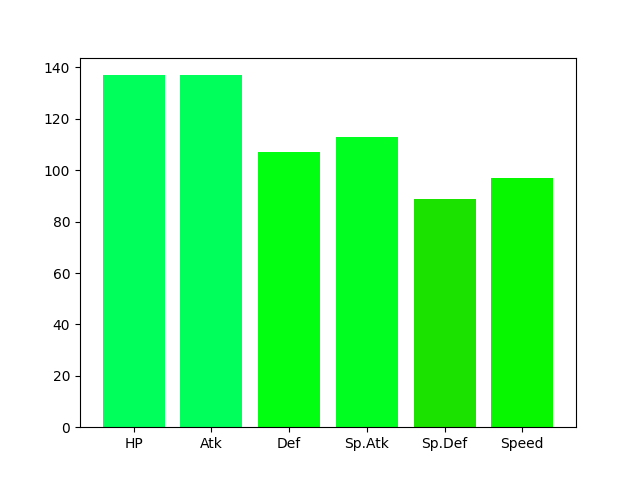
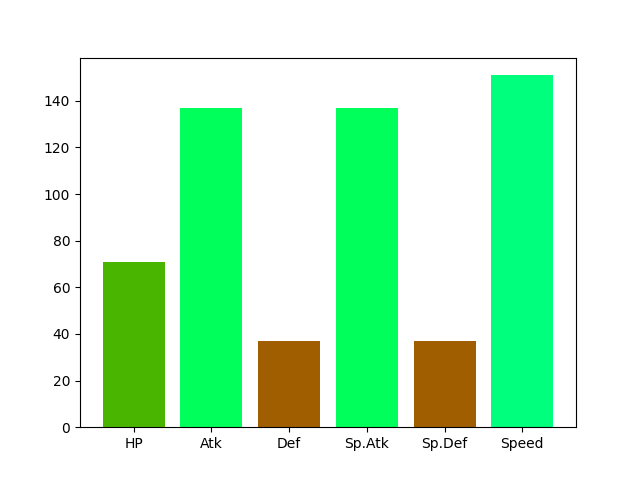
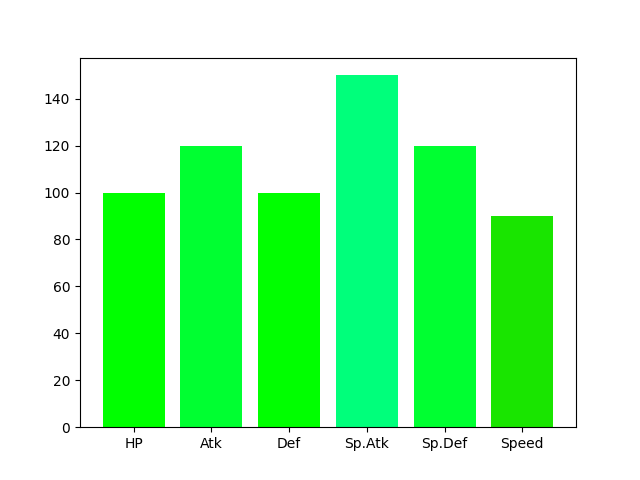
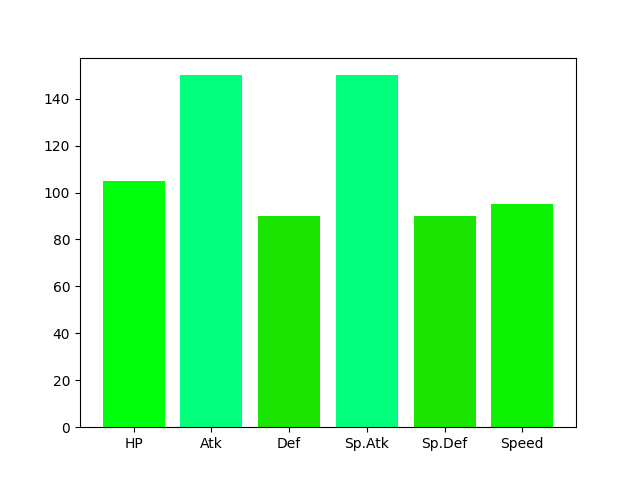
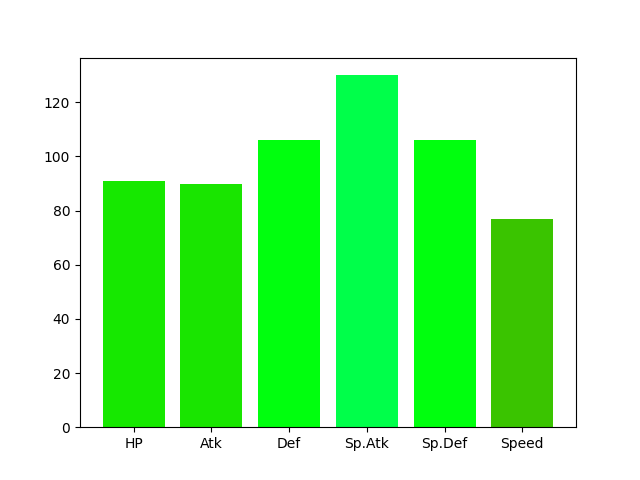
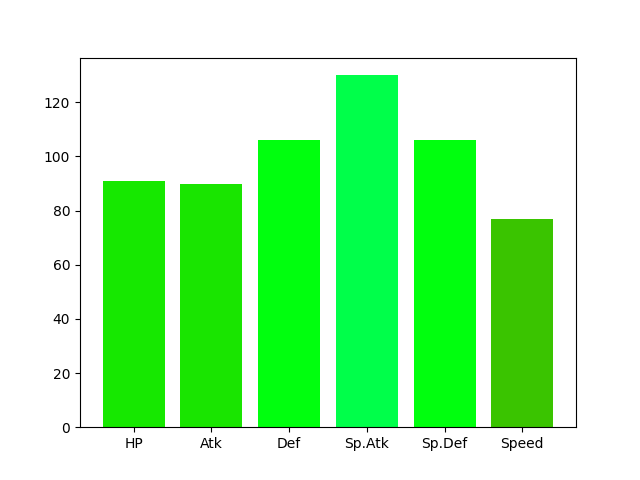
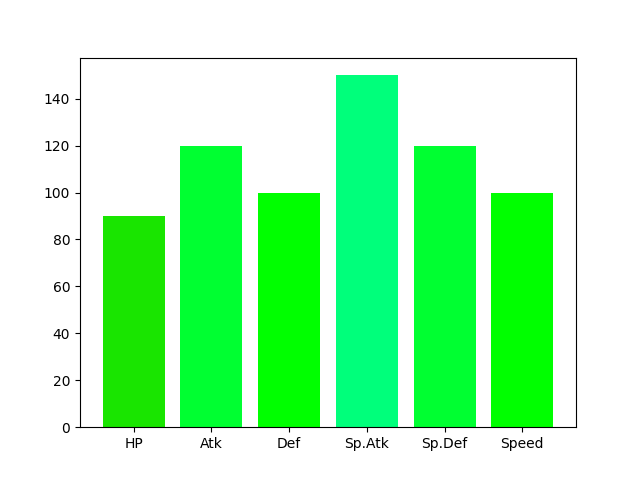
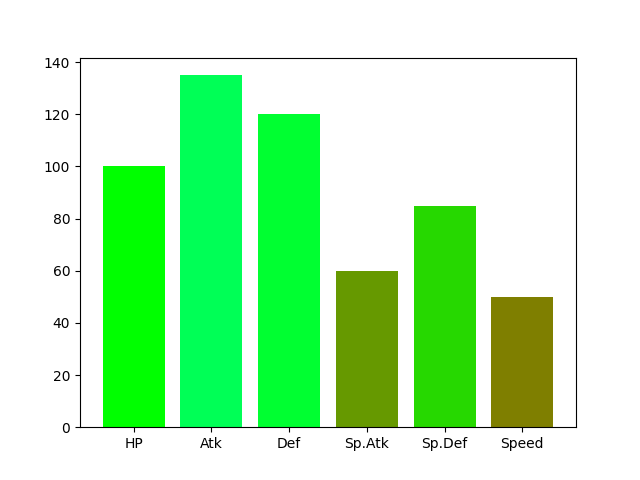
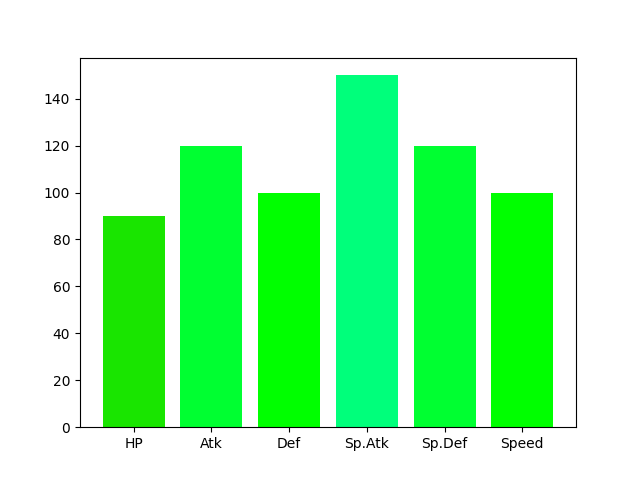
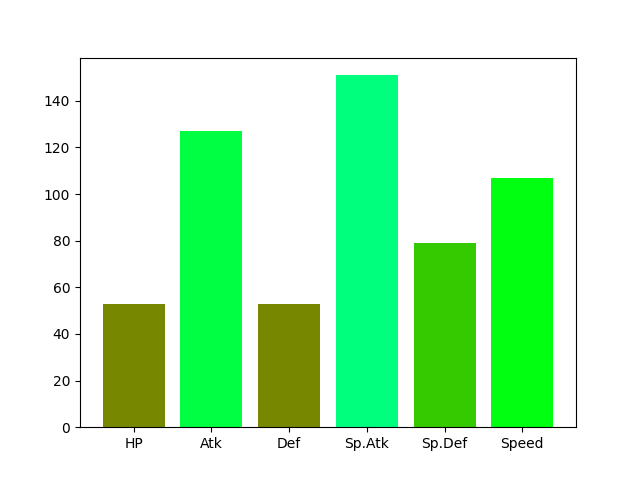
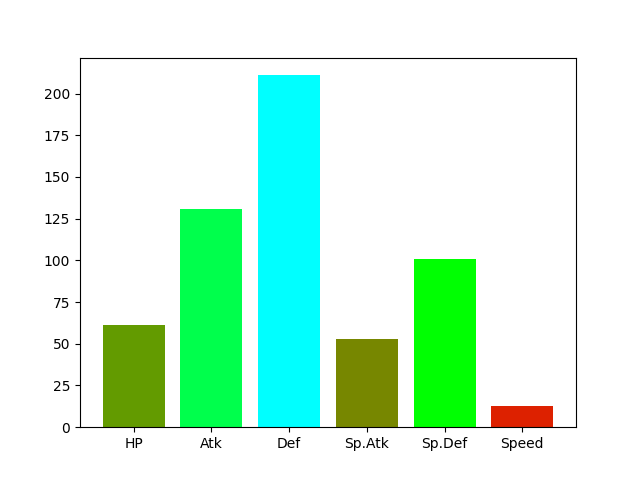
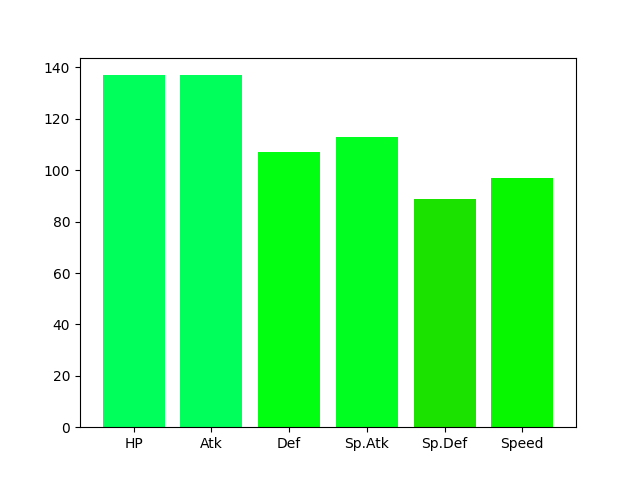
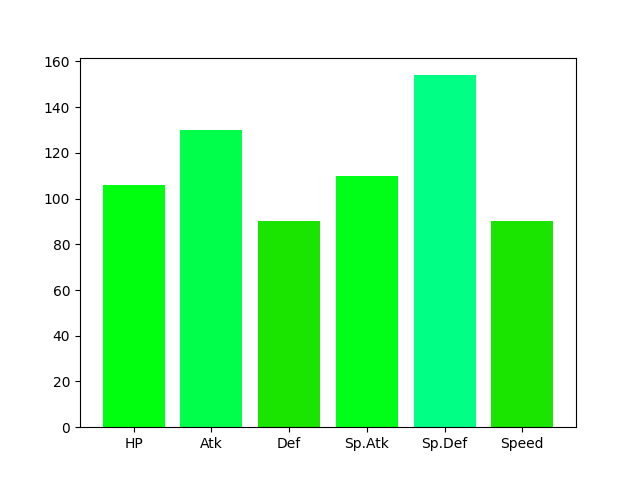
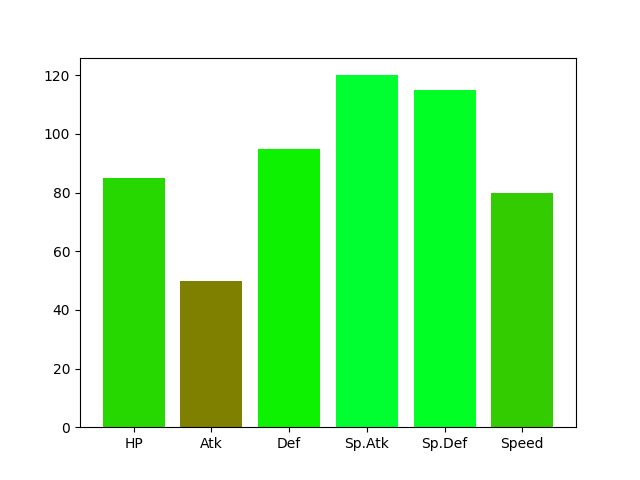
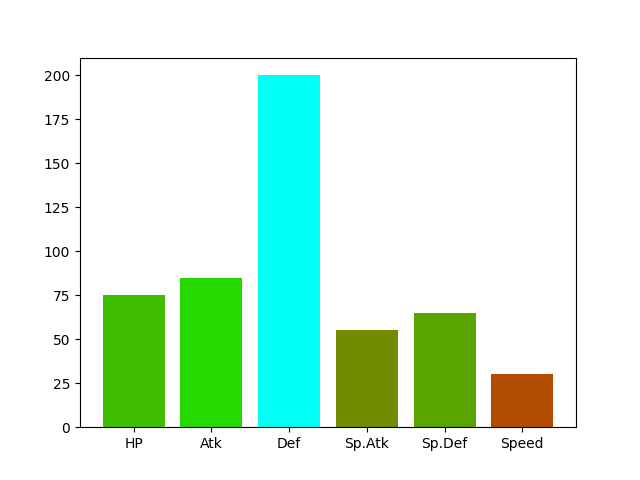
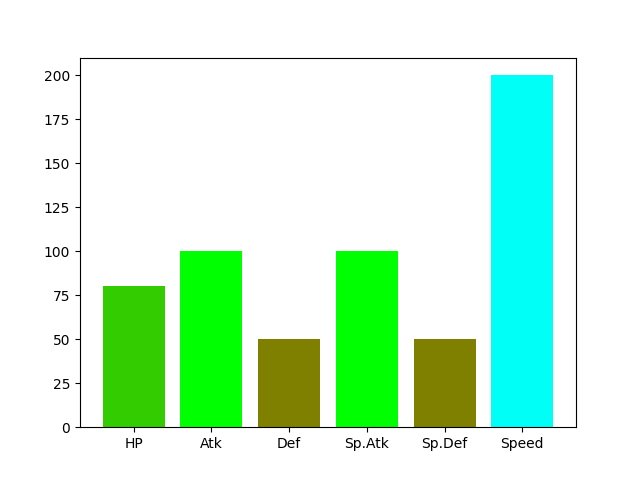
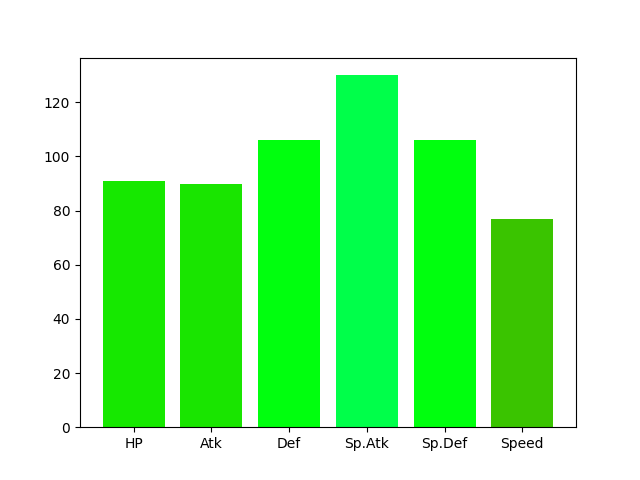
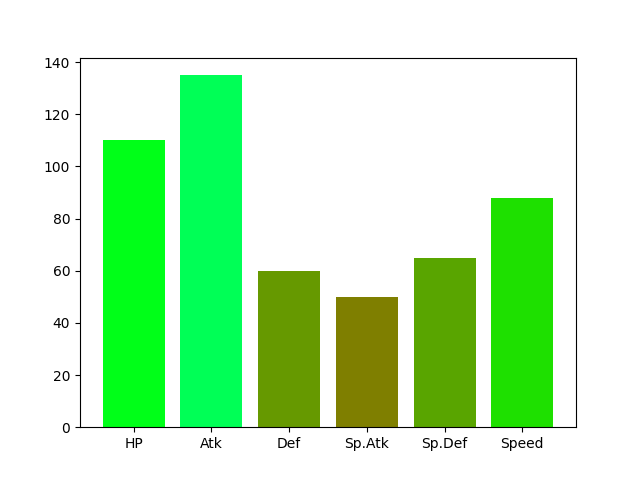
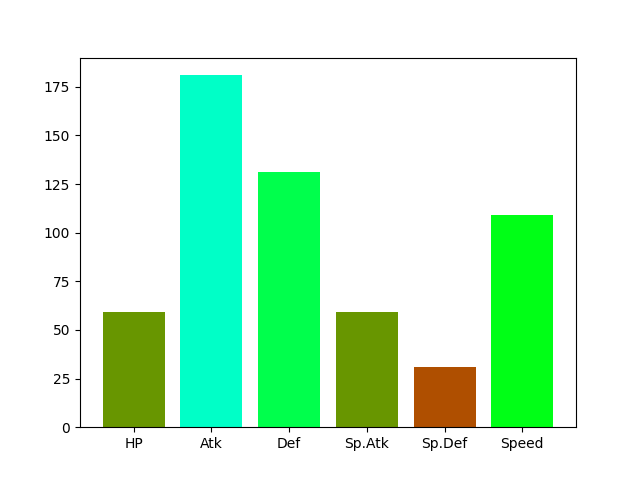
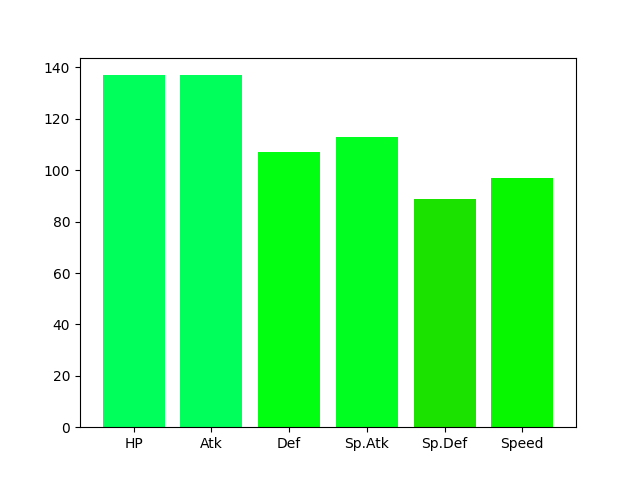
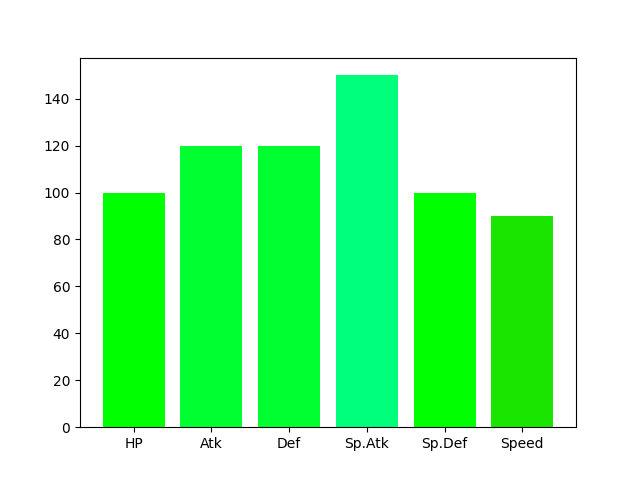
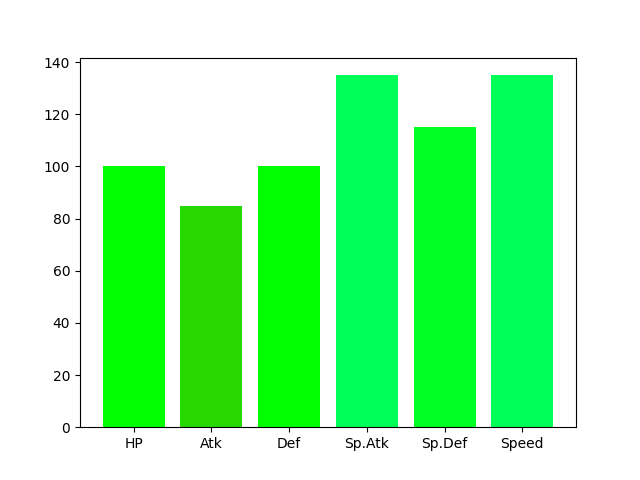
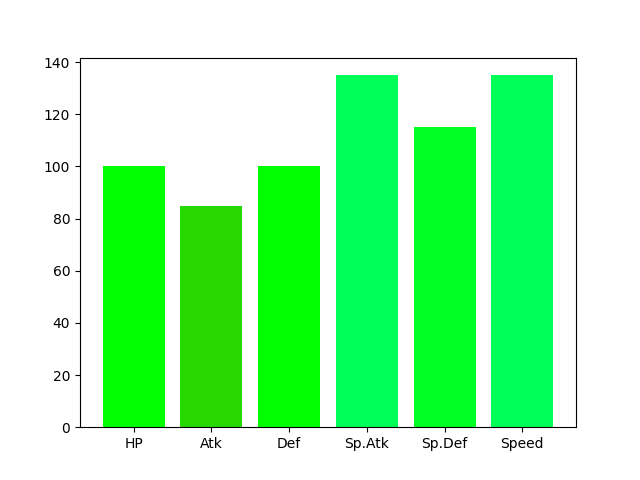
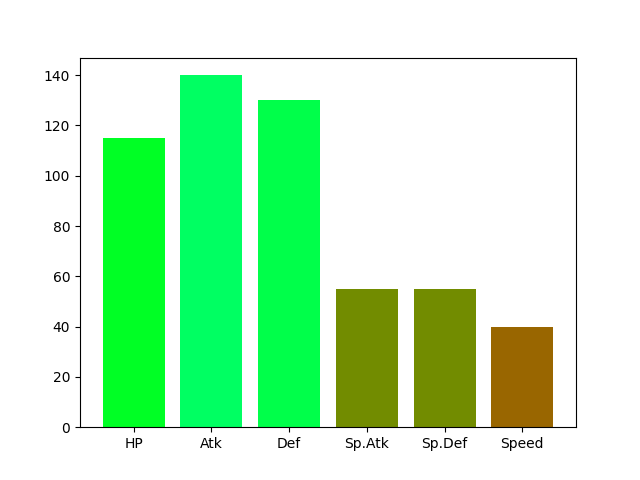
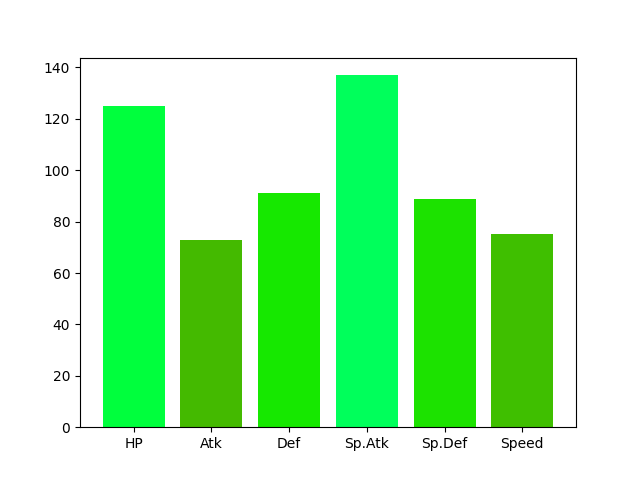
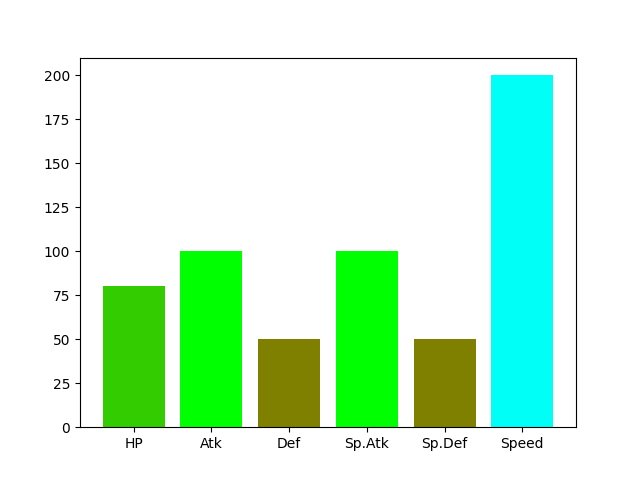
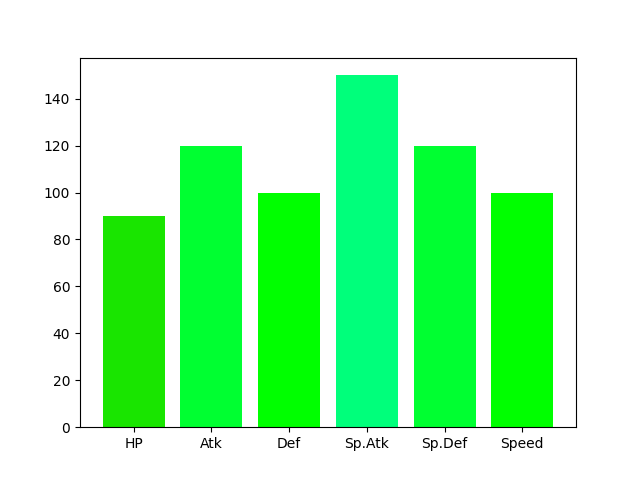
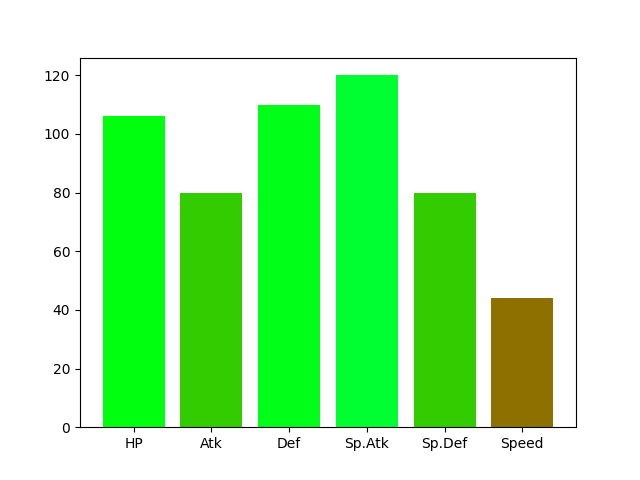
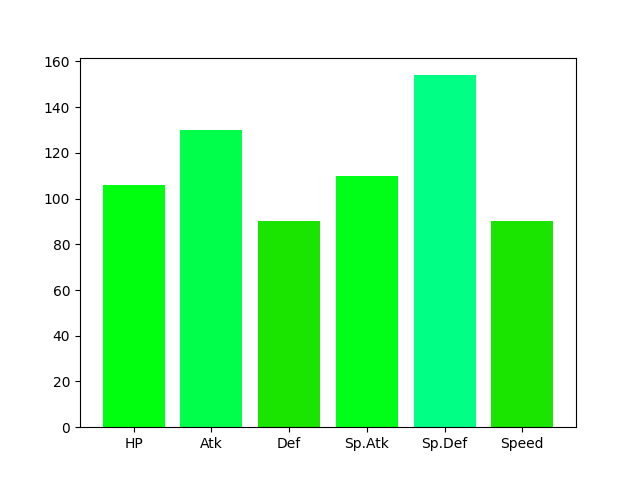
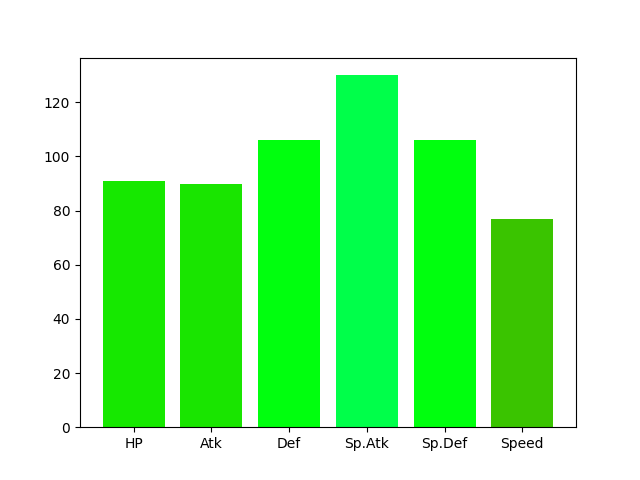
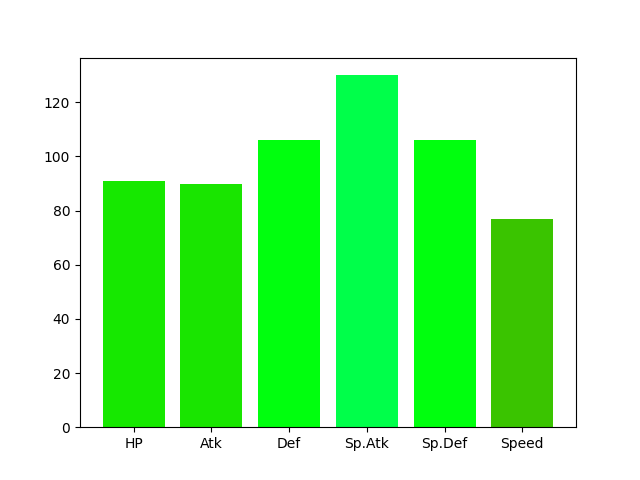
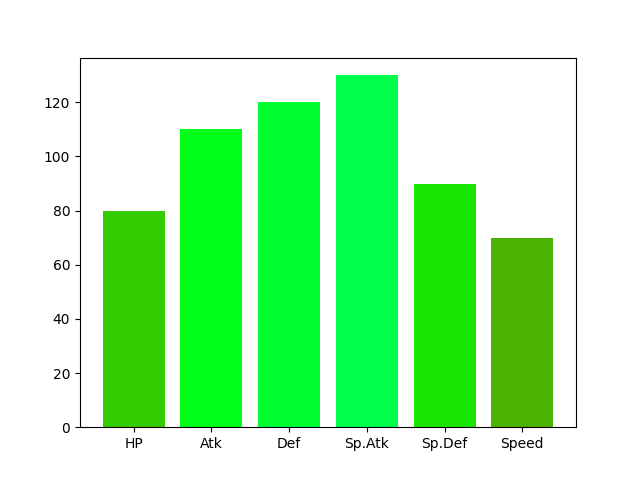
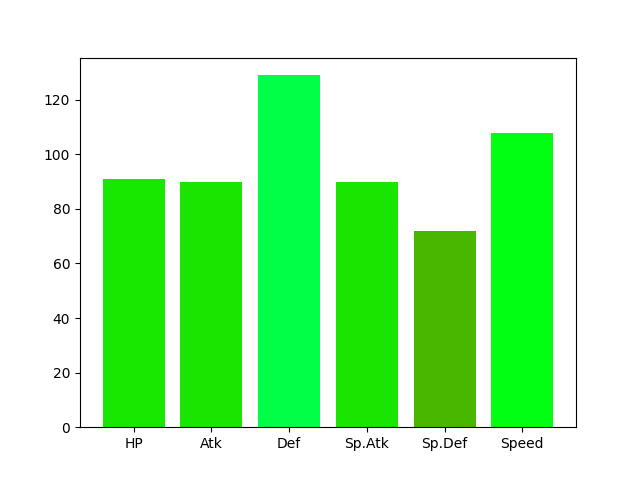
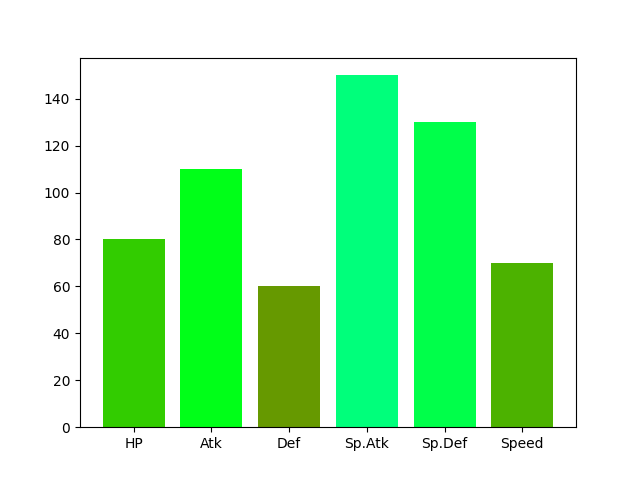
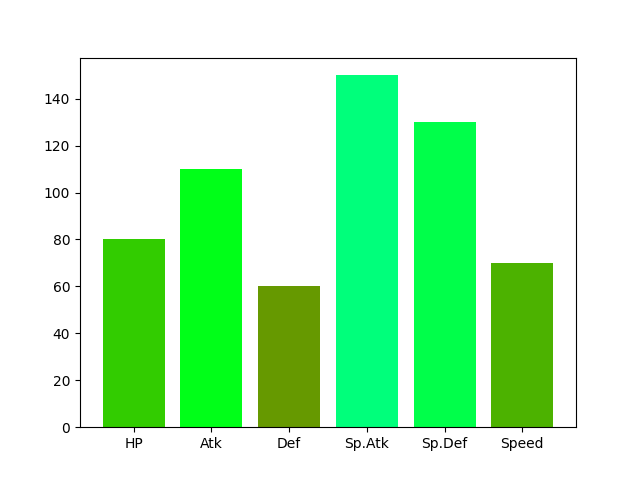
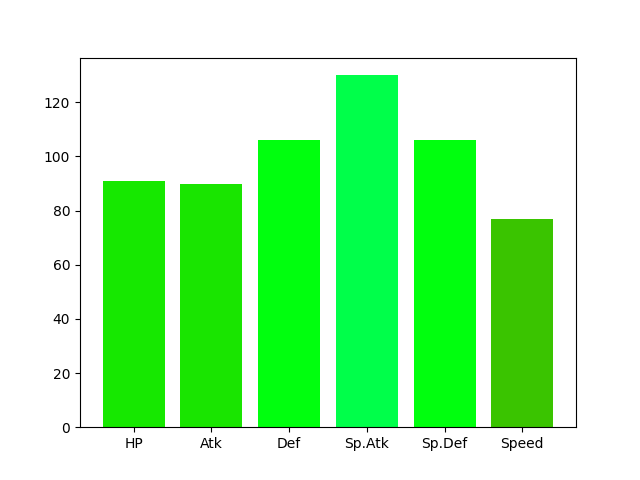
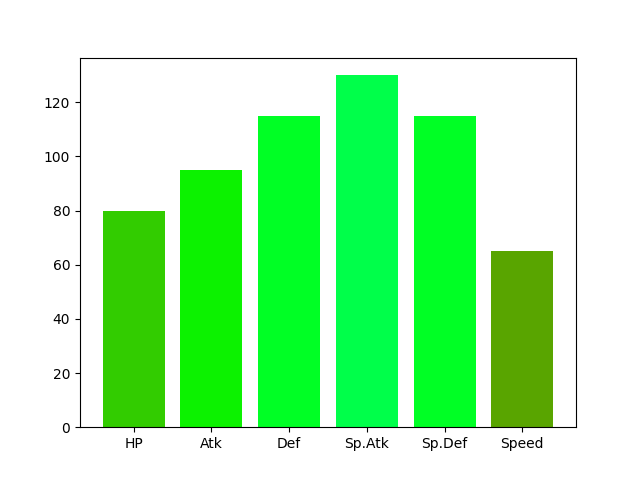
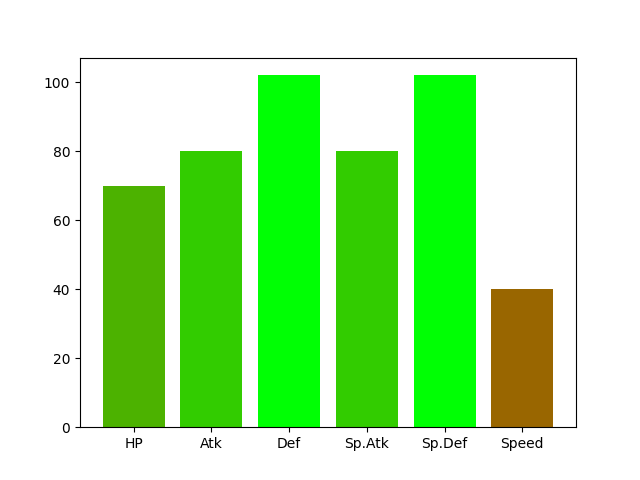
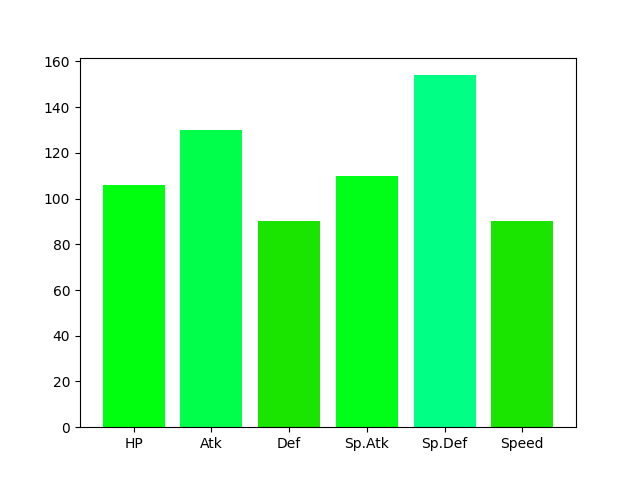
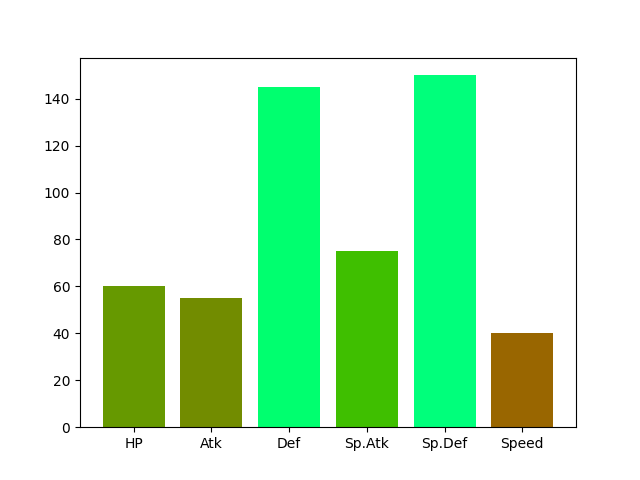
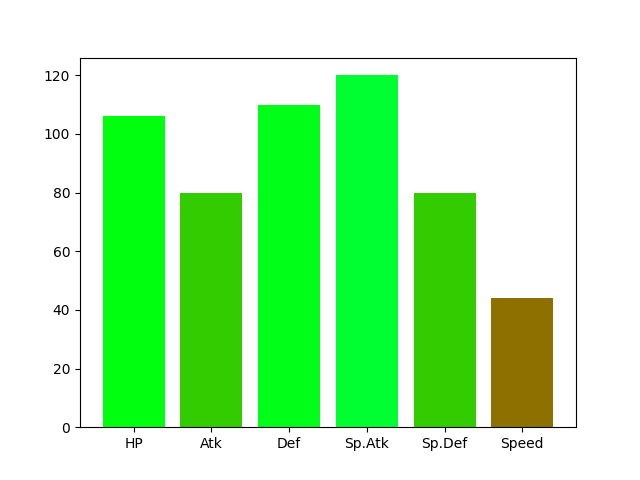
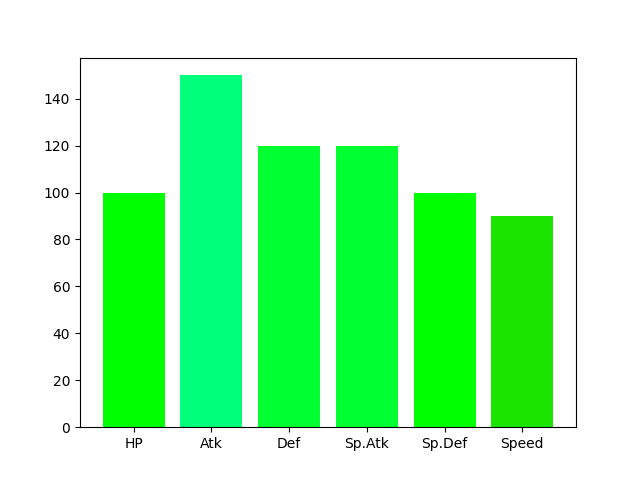
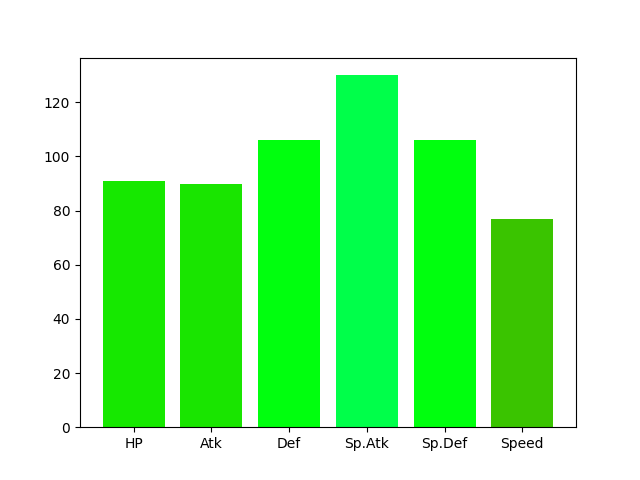
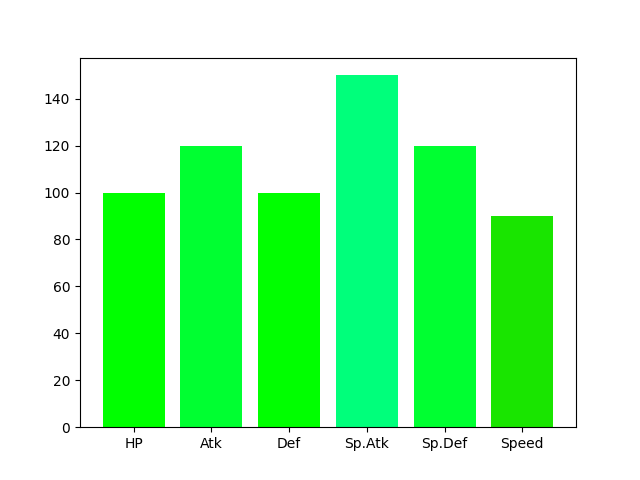
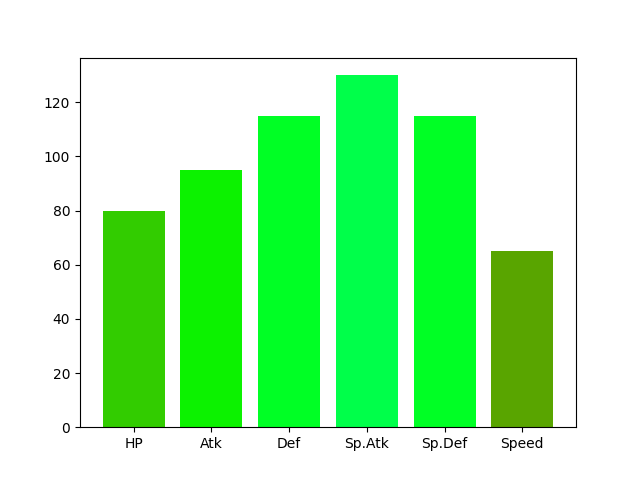
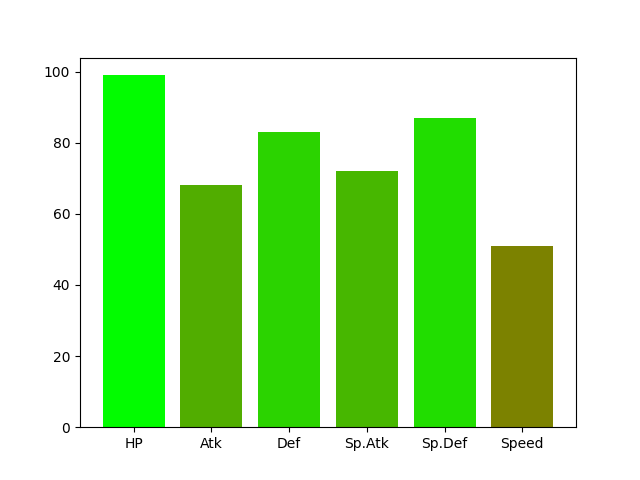
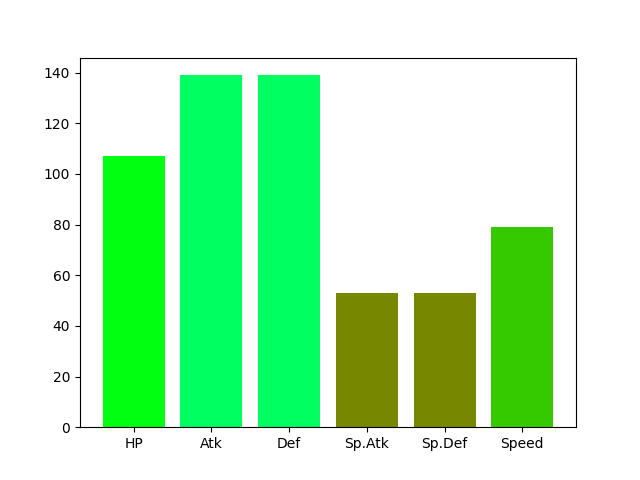
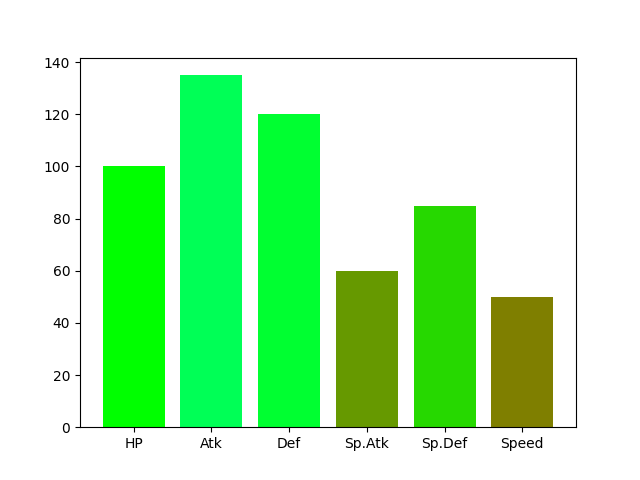
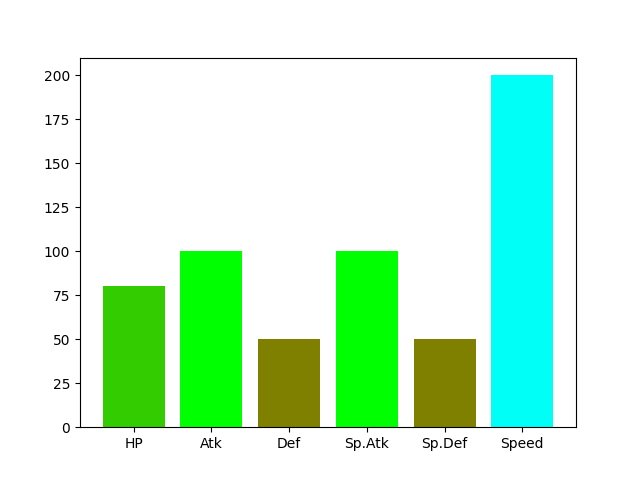
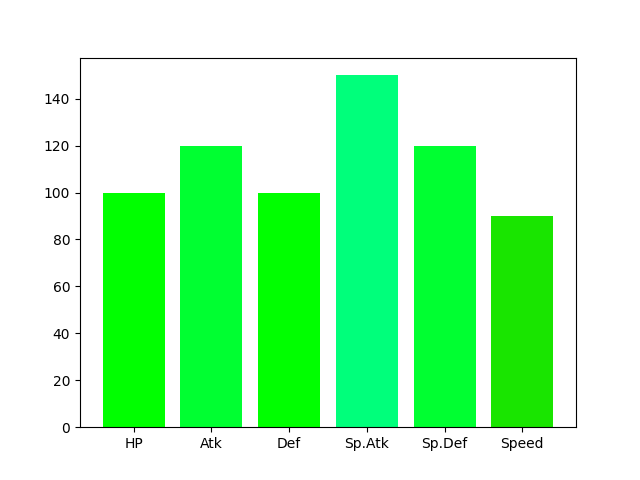
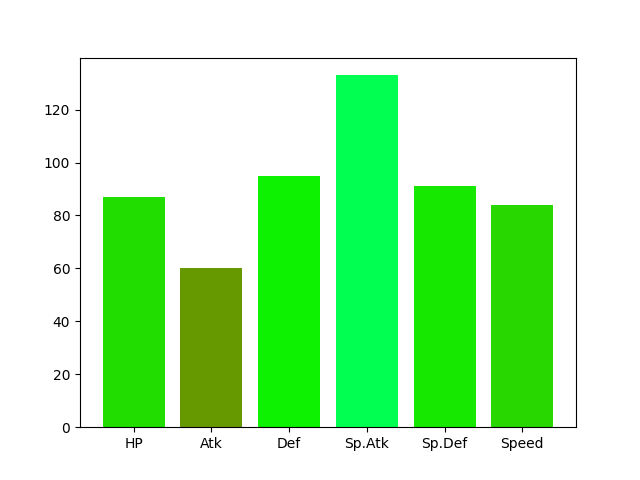
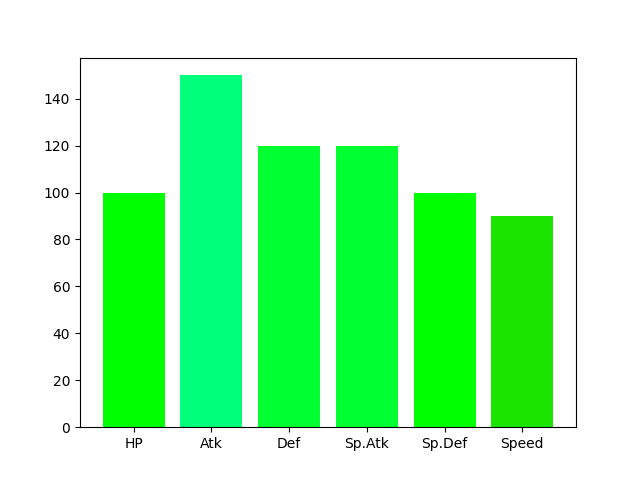
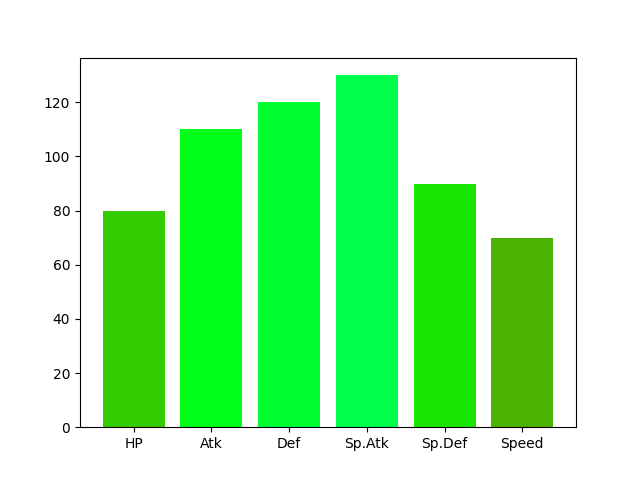
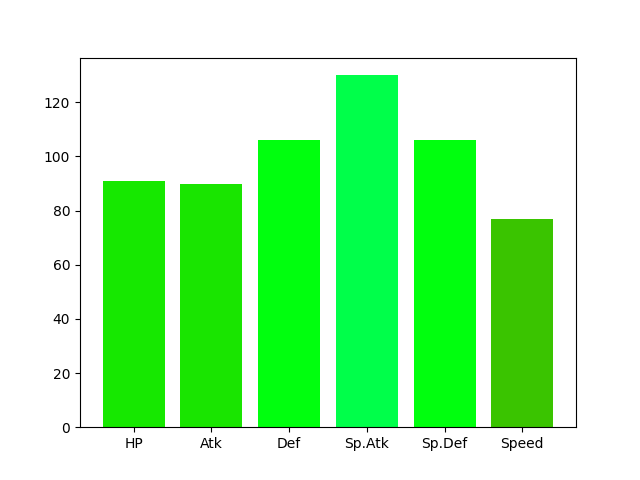
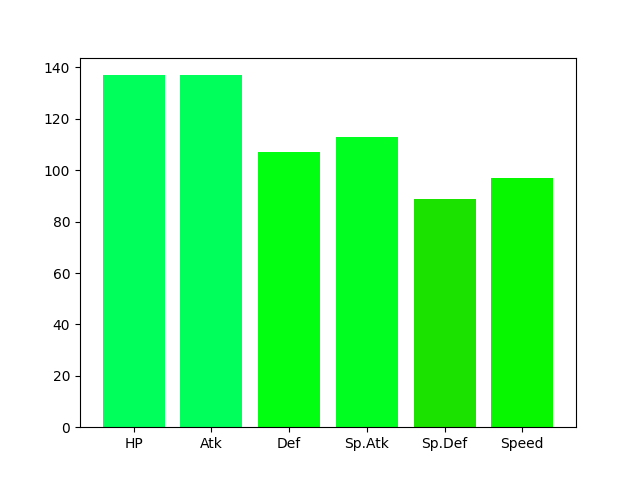
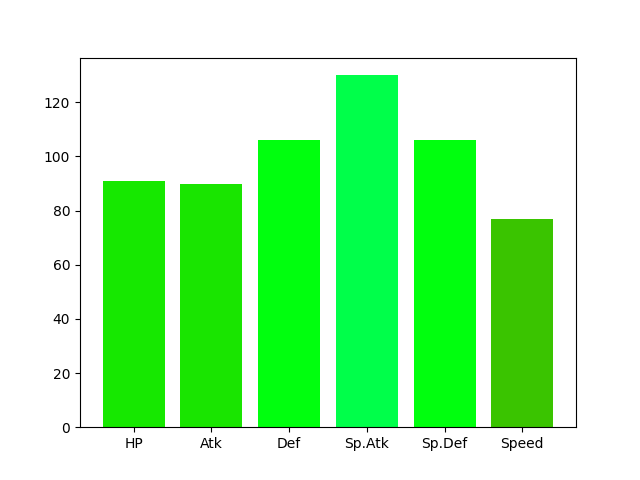
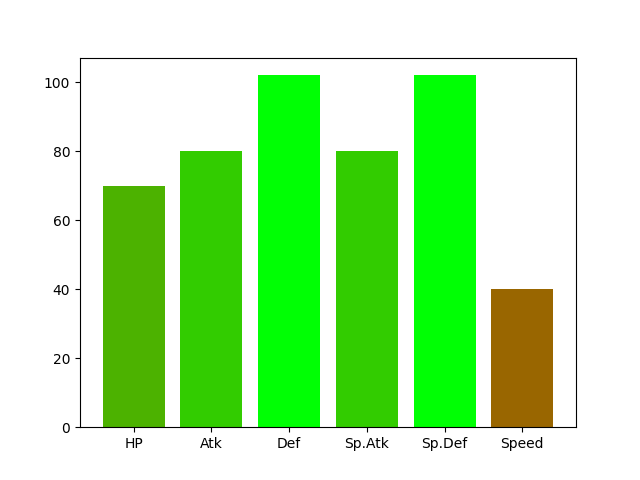
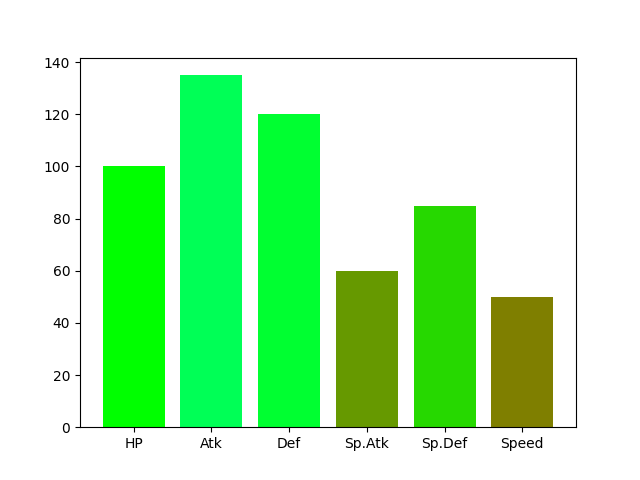
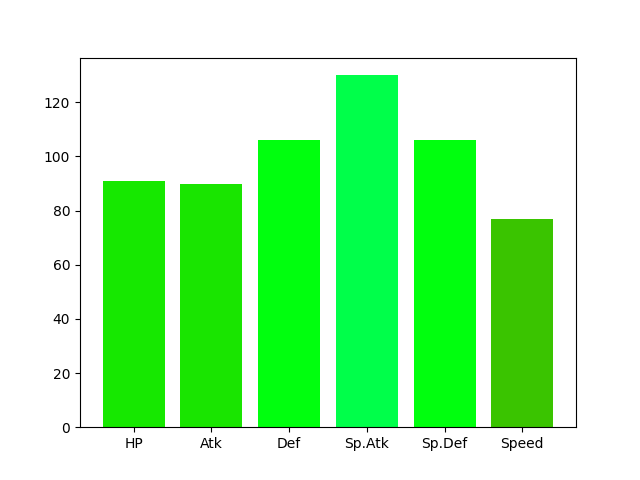
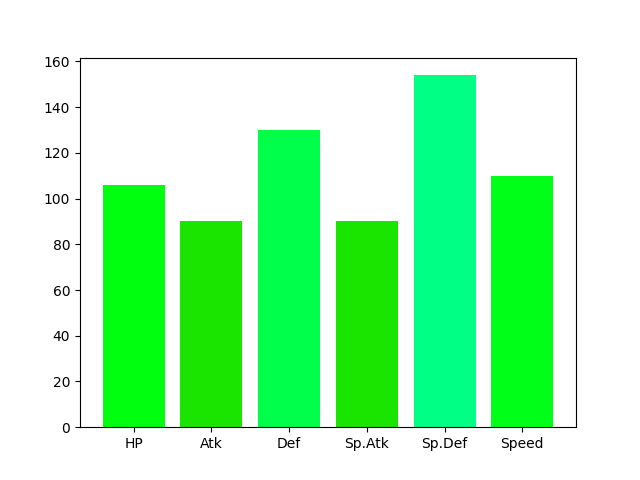
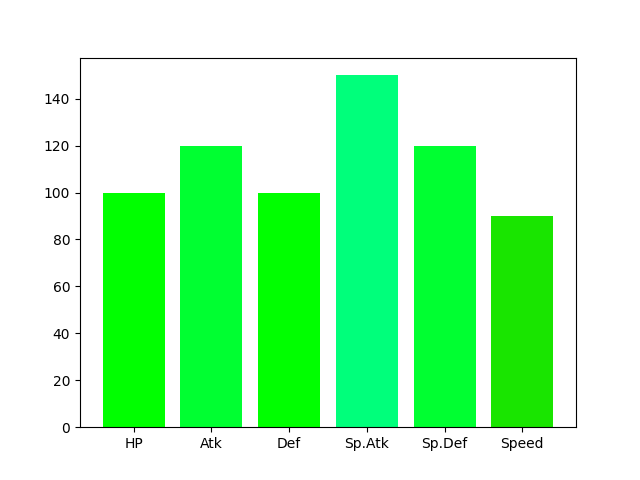
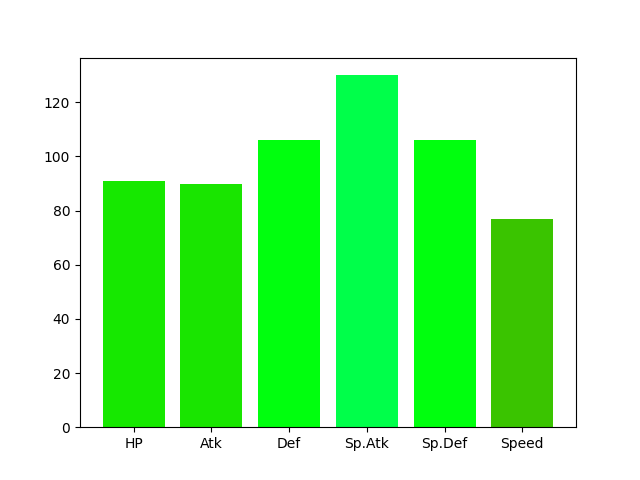
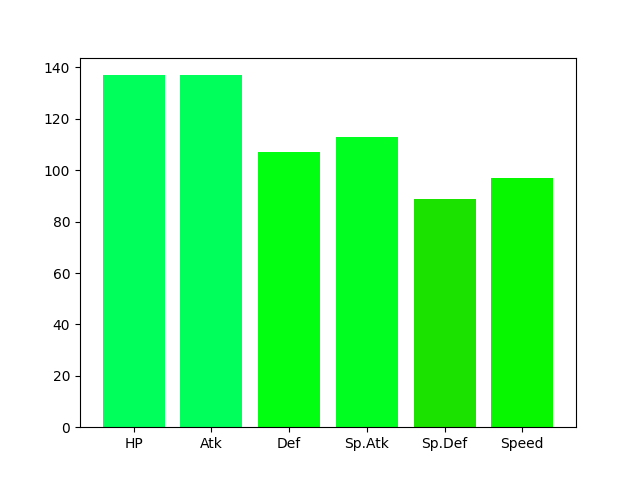
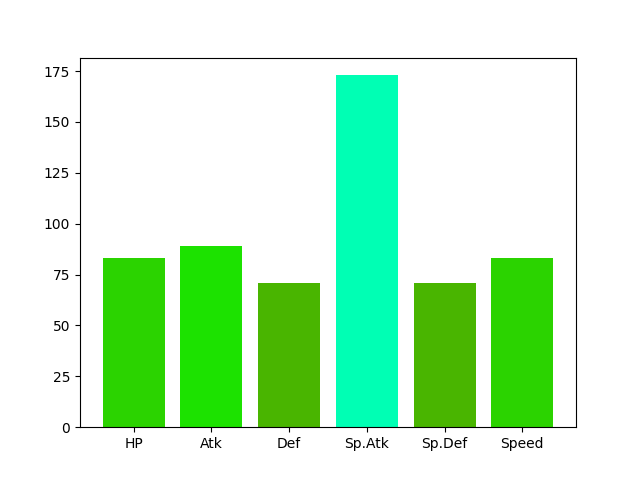
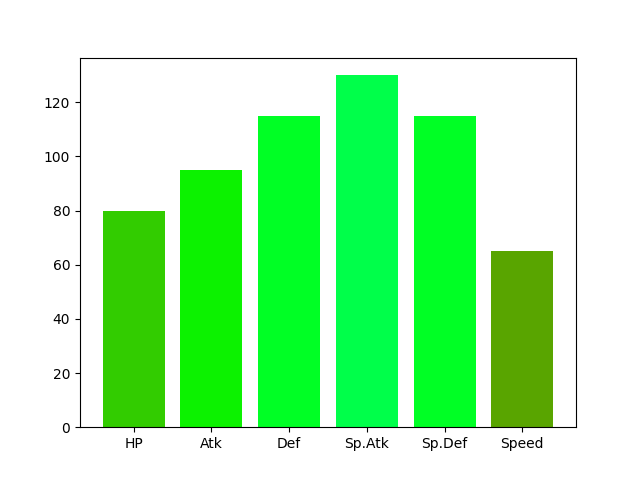
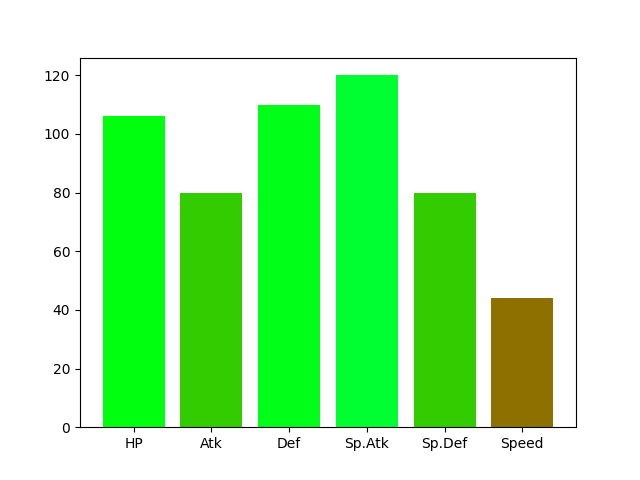
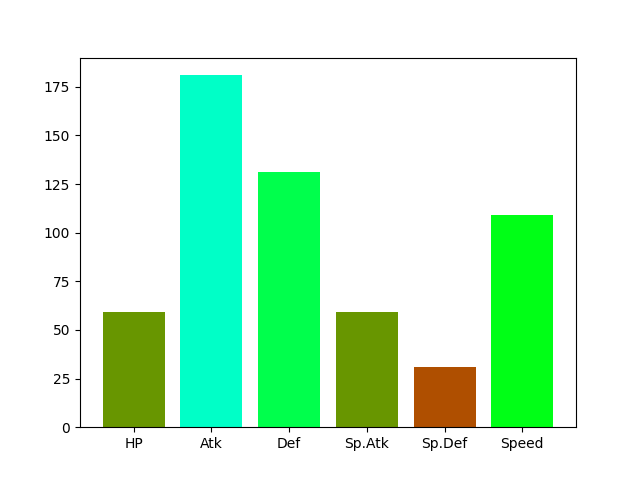
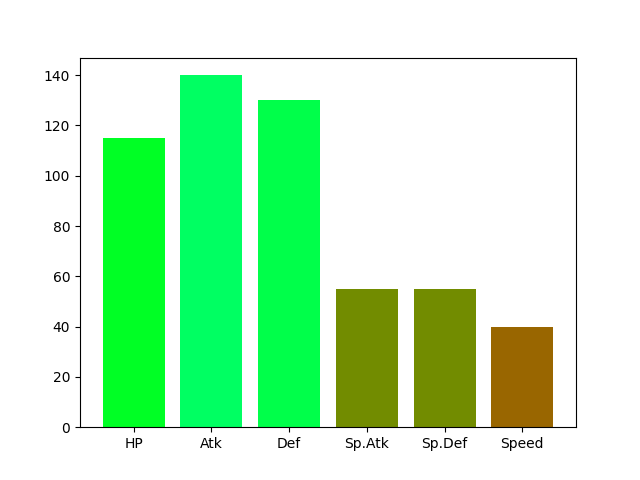
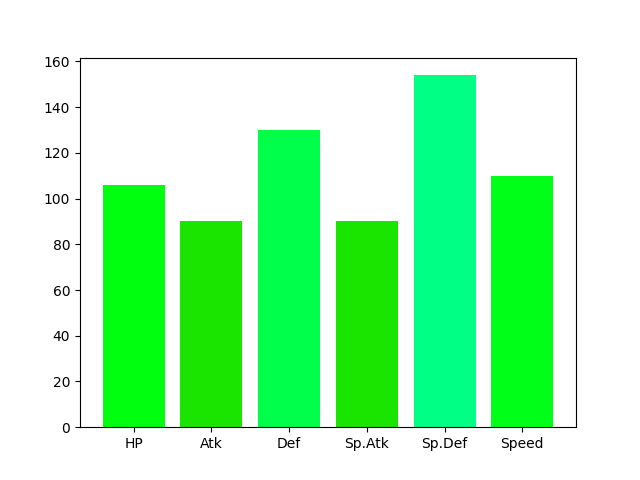
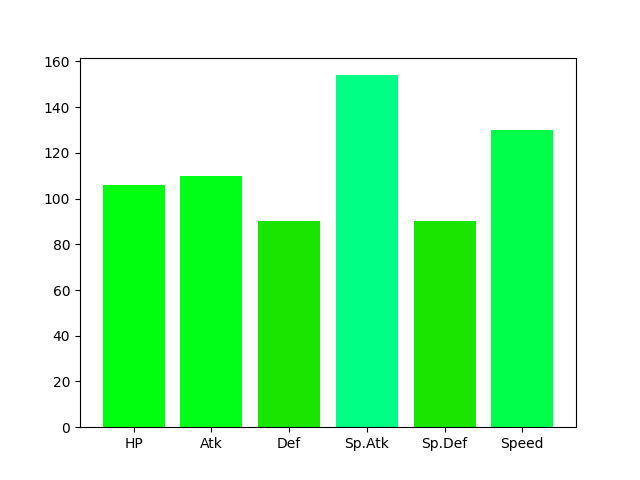
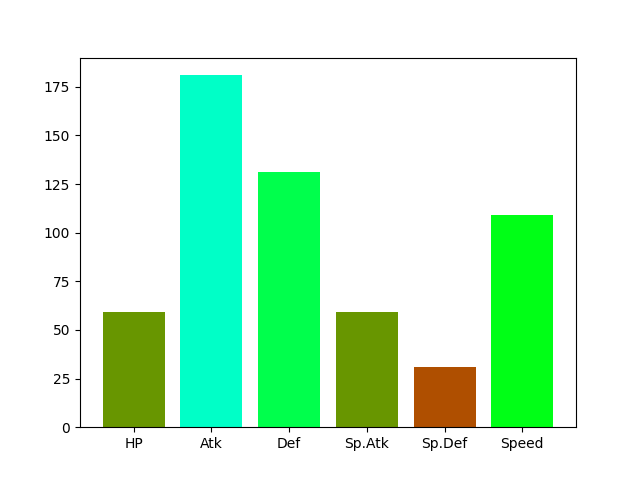
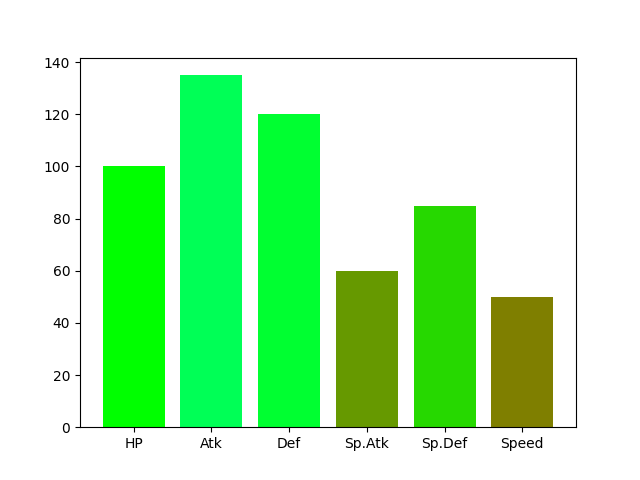
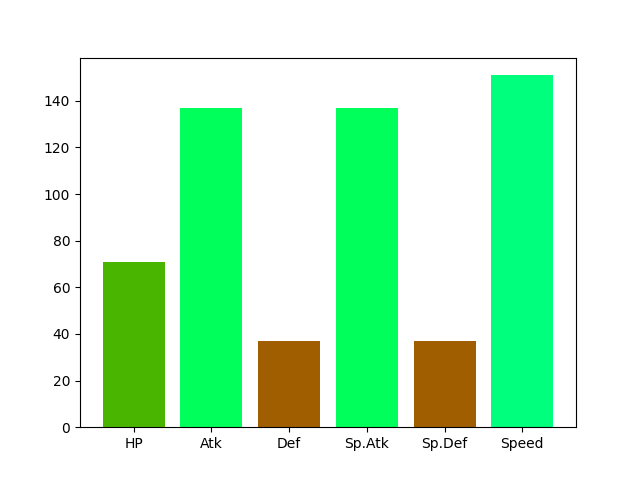
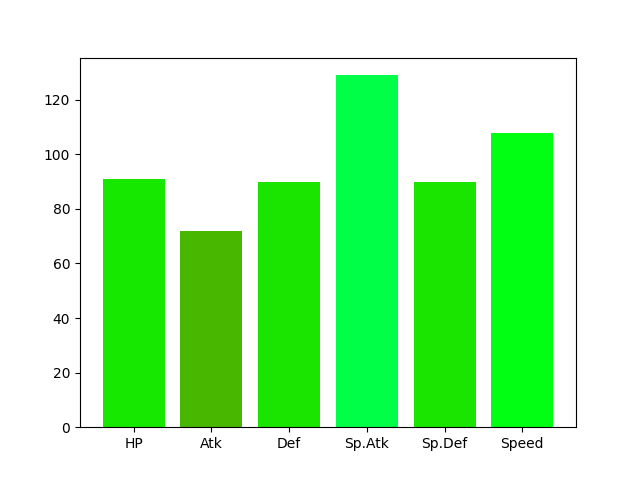
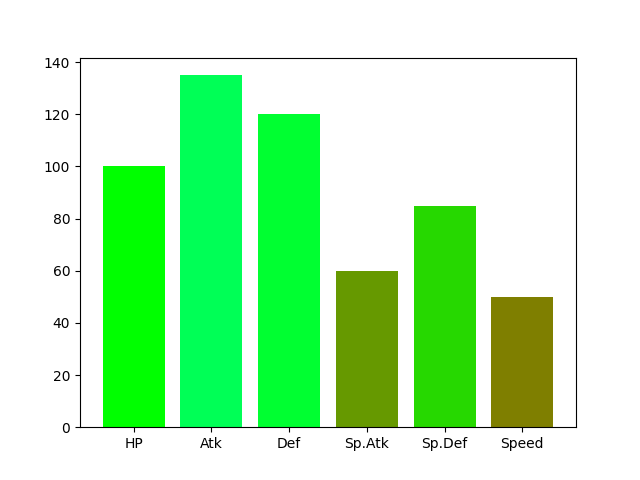
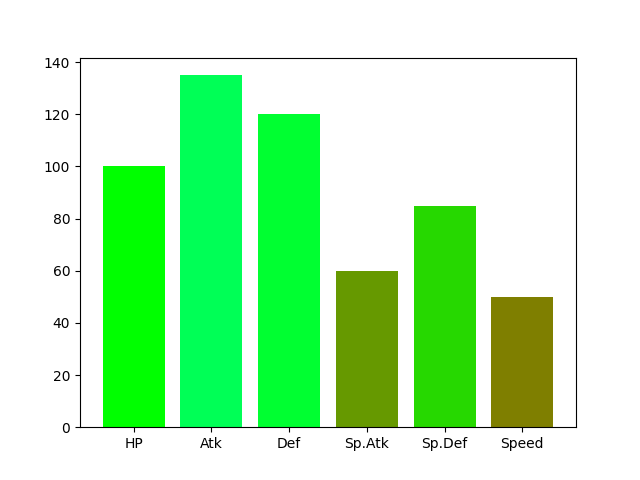
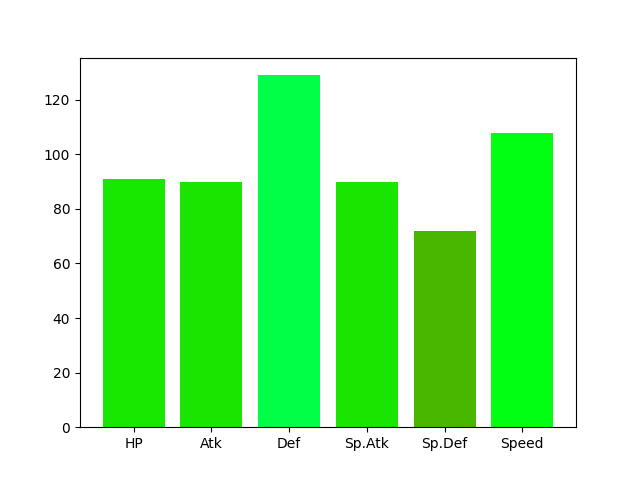
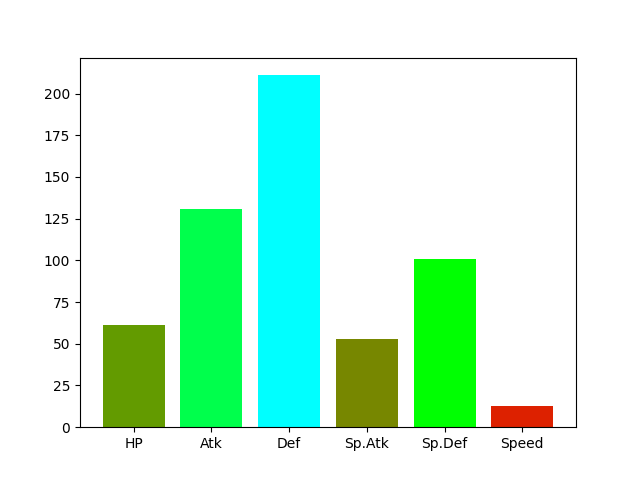
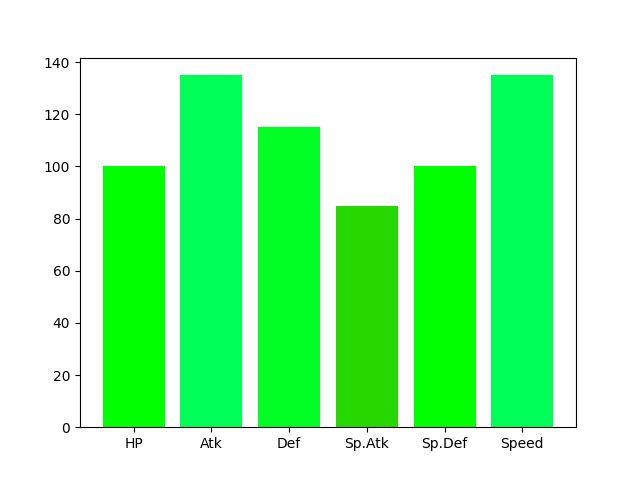
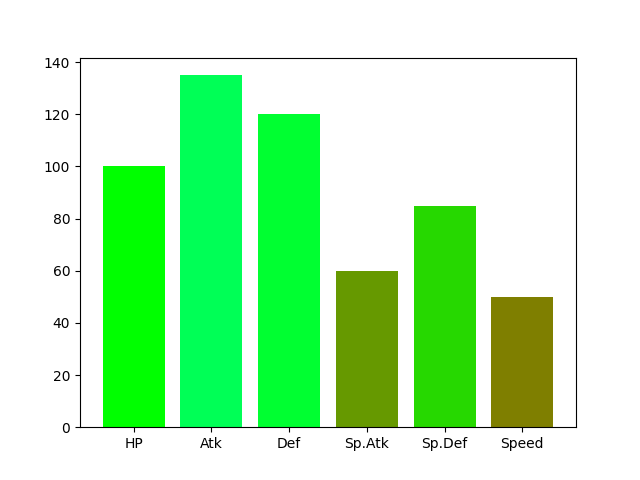
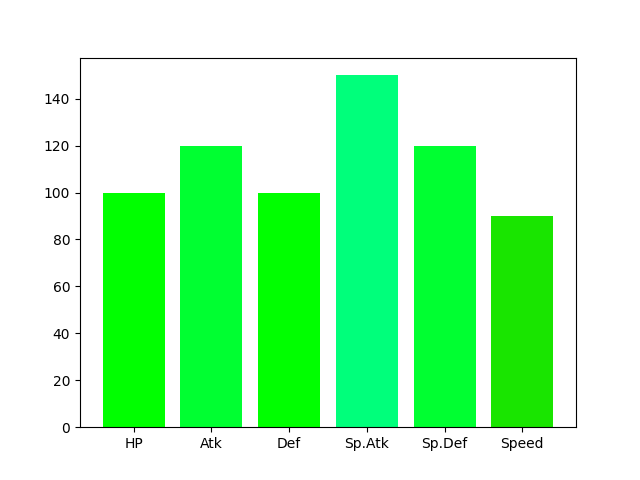
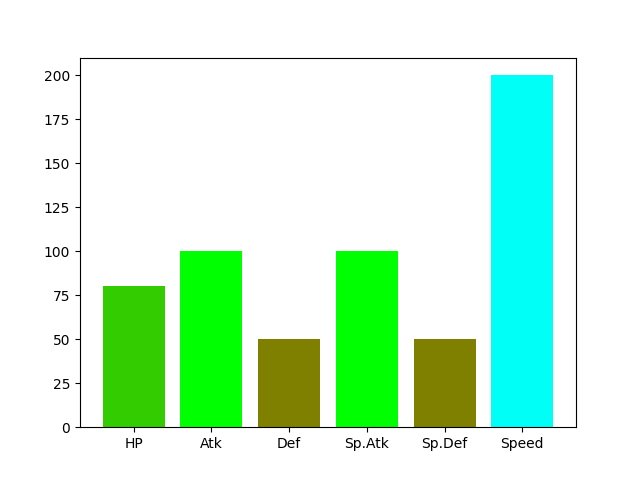
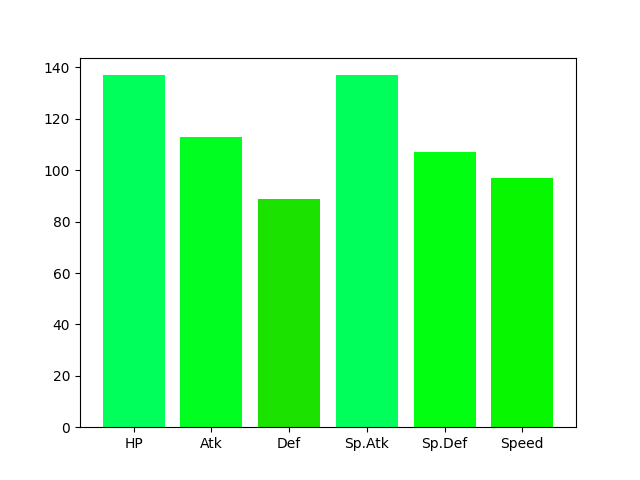
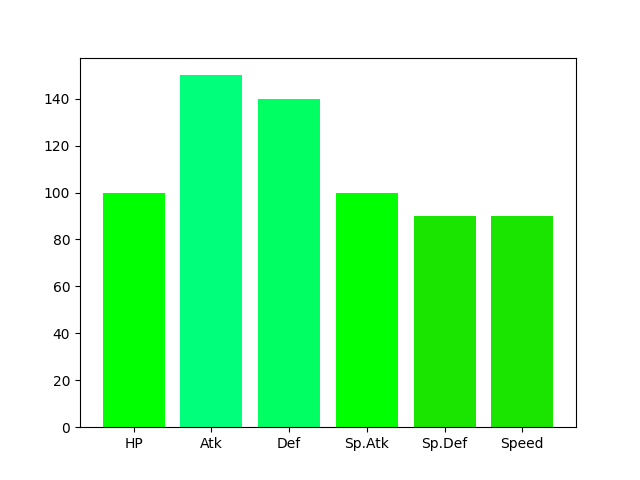
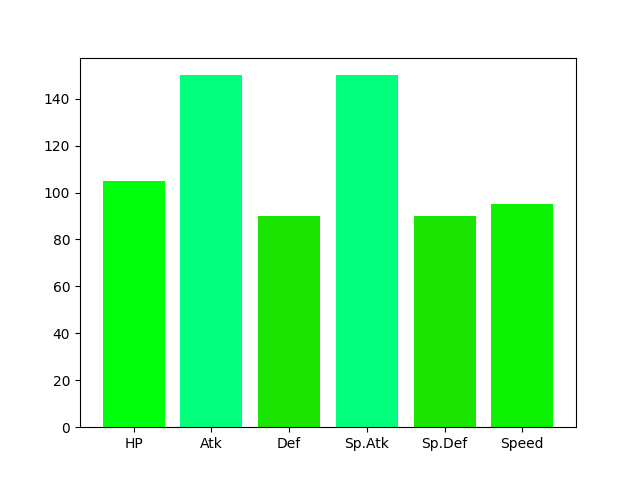
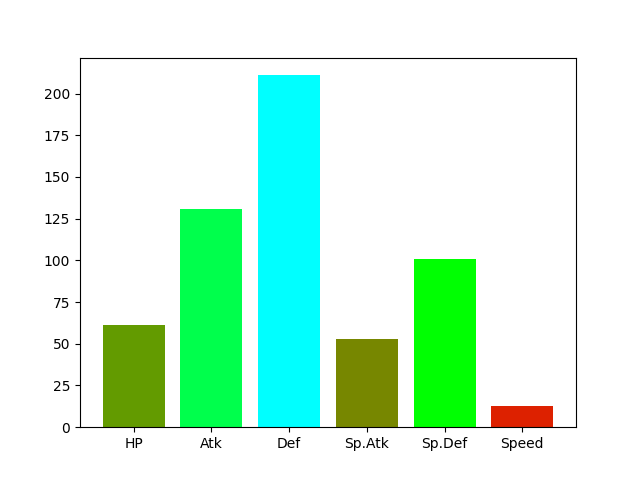
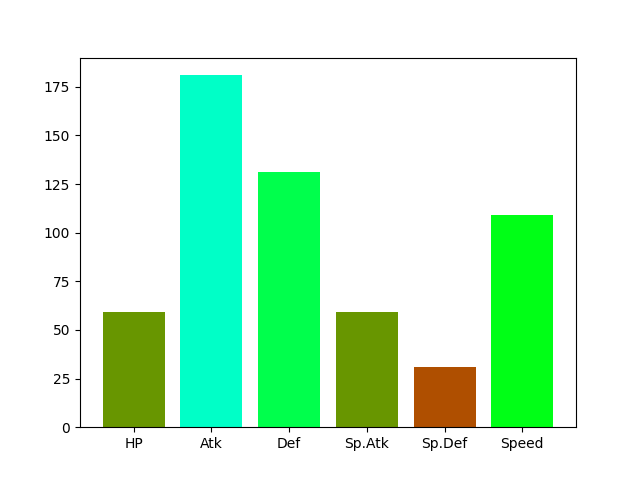
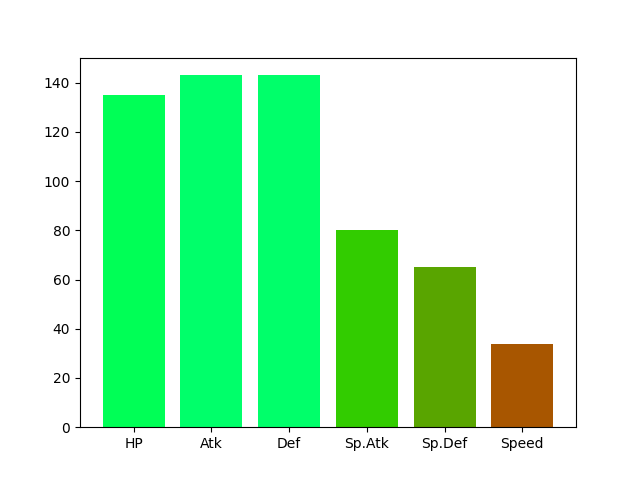
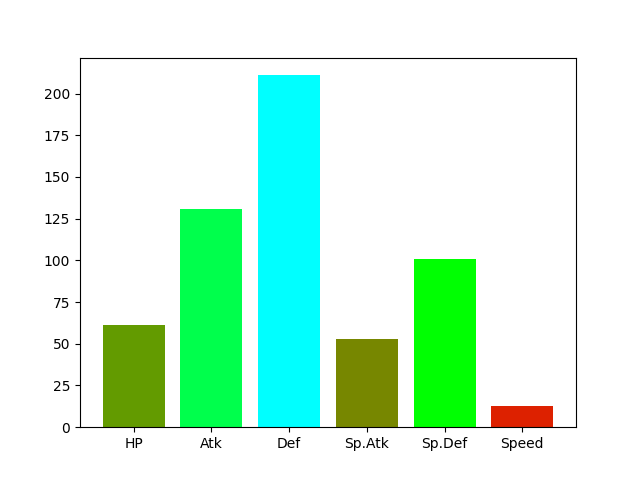
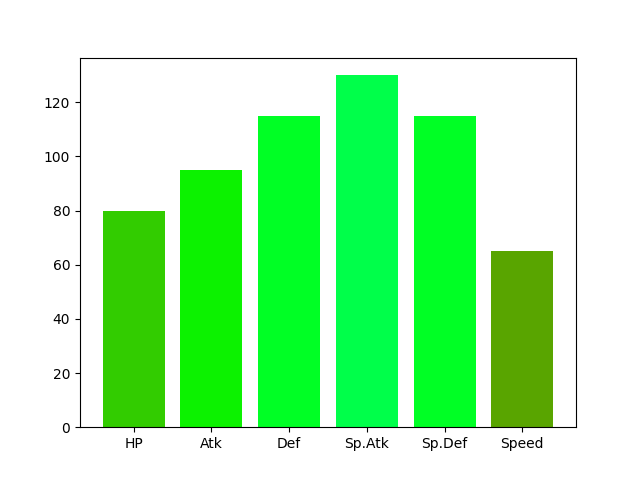
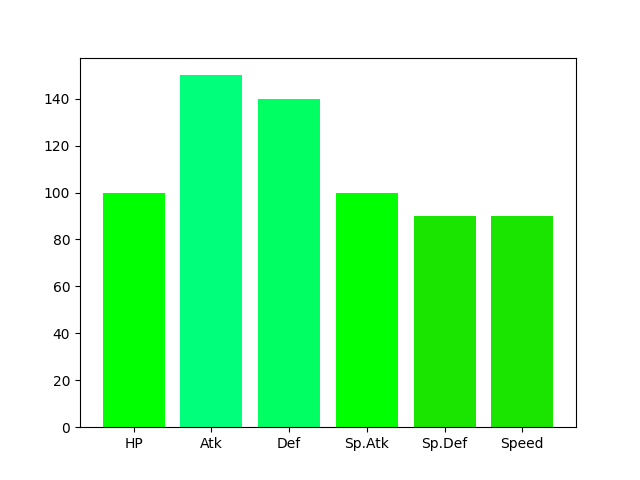
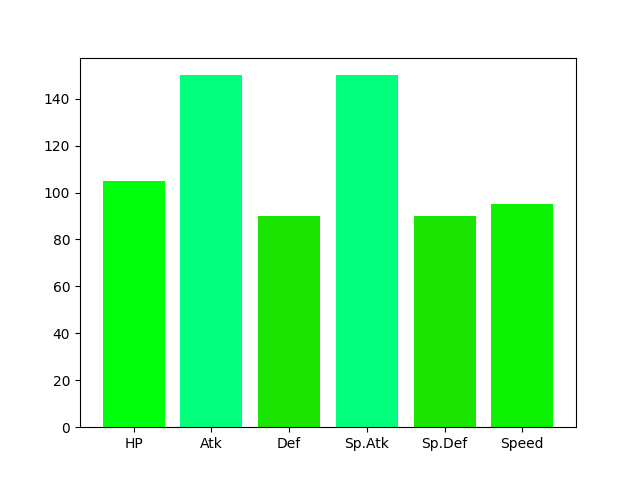
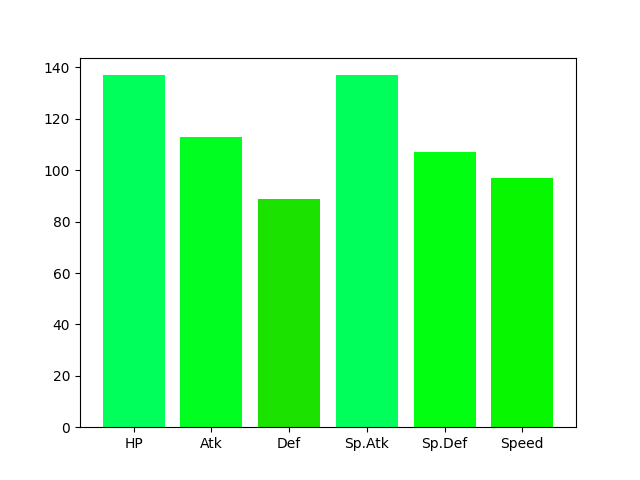
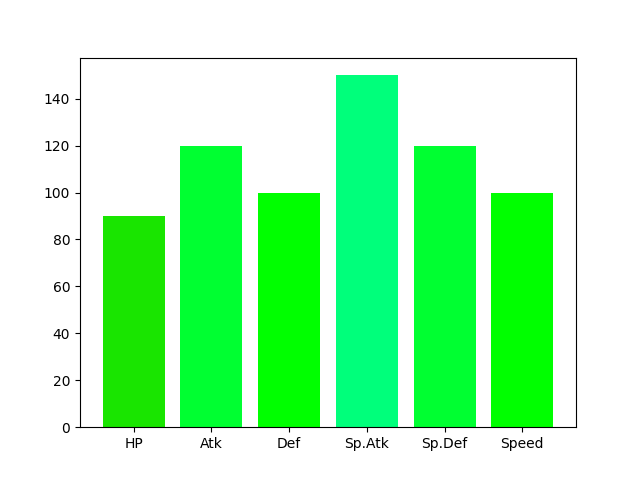
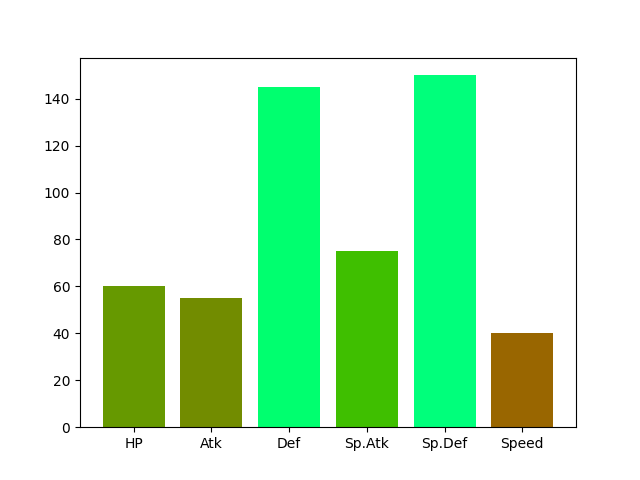
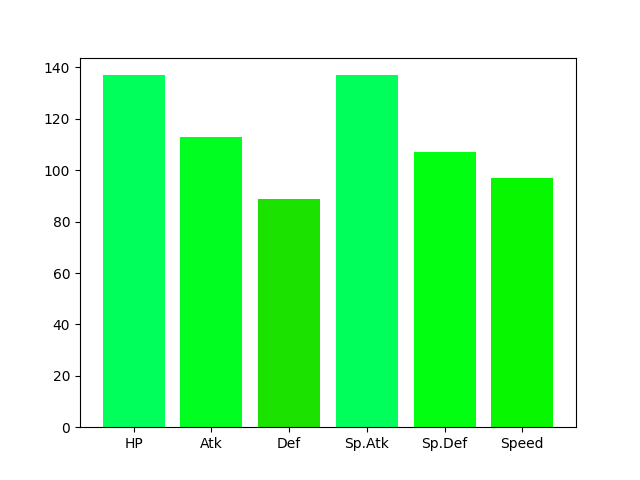
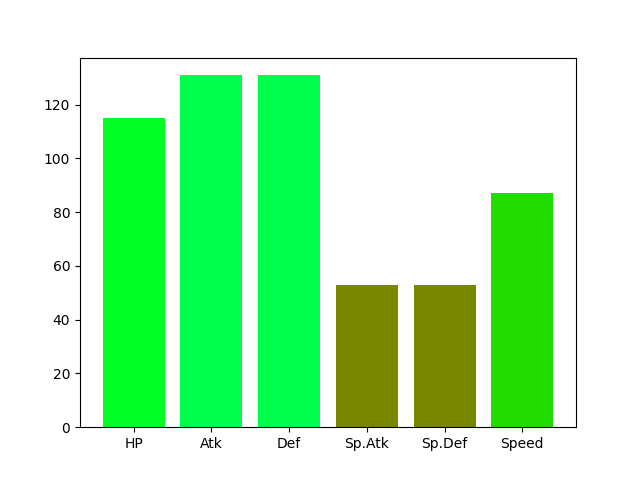
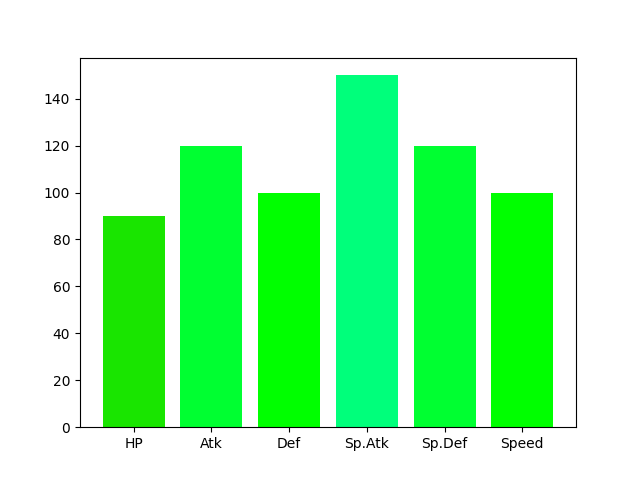
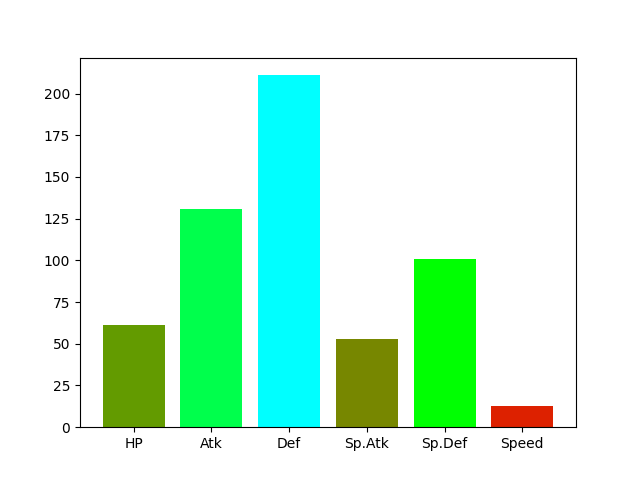

In [67]:
showTeam(best_team)